In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [3]:
# Importing the required libraries

import numpy as np      # numpy library which was used for arrays and do some numeric operations 
import pandas as pd     
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# CREDIT CASE STUDY  


The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

##  TASK 1 : READING THE DATA

### 1.1 Structure of data

###### Reading data from the system path. so for reading we use pandas library read_csv() function. 

In [4]:
# Reading data from excel sheet

New_Applicant = pd.read_csv("C:/Users/suvandhana/Downloads/application_data.csv")
New_Applicant.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

##### check the number of rows and columns in the dataframe by using shape

In [5]:
#check the number of rows and columns in the dataframe
New_Applicant.shape

(307511, 122)

In [6]:
#Check the column-wise info of the dataframe

New_Applicant.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [7]:
# Check the summary for the numeric columns 
New_Applicant.describe()  ## describe() is used to calculate the numeric columns like mean,minimum value and maximum value


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
null_values = New_Applicant.isnull().sum()
null_values

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

##  1.2 Previous application Details

In [9]:
# Reading data from excel sheet
prev_Applicant = pd.read_csv("C:/Users/suvandhana/Downloads/previous_application.csv")
prev_Applicant.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#check the number of rows and columns in the dataframe
prev_Applicant.shape

(1670214, 37)

In [11]:
#Check the column-wise info of the dataframe

prev_Applicant.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [12]:
# Check the summary for the numeric columns
prev_Applicant.describe()     ## describe() is used to calculate the numeric columns like mean,minimum value and maximum value     

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [13]:
## check the null values in every column
prev_Applicant.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

### 1.3 check the number of unique values in every column

#### checking the unique values in every column by using nunique() function and sort them in descending order

In [14]:
New_Applicant.nunique().sort_values(ascending = False)

SK_ID_CURR                      307511
EXT_SOURCE_2                    119831
EXT_SOURCE_1                    114584
DAYS_BIRTH                       17460
DAYS_REGISTRATION                15688
AMT_ANNUITY                      13672
DAYS_EMPLOYED                    12574
DAYS_ID_PUBLISH                   6168
AMT_CREDIT                        5603
LIVINGAREA_MODE                   5301
LIVINGAREA_MEDI                   5281
LIVINGAREA_AVG                    5199
TOTALAREA_MODE                    5116
BASEMENTAREA_MODE                 3841
BASEMENTAREA_AVG                  3780
DAYS_LAST_PHONE_CHANGE            3773
BASEMENTAREA_MEDI                 3772
LANDAREA_MODE                     3563
LANDAREA_MEDI                     3560
LANDAREA_AVG                      3527
NONLIVINGAREA_MODE                3327
NONLIVINGAREA_MEDI                3323
NONLIVINGAREA_AVG                 3290
COMMONAREA_MEDI                   3202
COMMONAREA_AVG                    3181
COMMONAREA_MODE          

## 2 Data Quality Check

### 2.1 Checking null values

AS we can see from new application data there are so many null values. So when doing analysis there may be wrong insights. Try to remove the columns or impute them with correct observations

Find the missing values in the dataframe and find out the percentage so that we can remove the columns which has more than 40% null values 

In [15]:
# identify missing values
total_null = New_Applicant.isnull().sum().sort_values(ascending = False)
null_percent = list((New_Applicant.isnull().sum()/len(New_Applicant)*100).sort_values(ascending = False))
missing_val = pd.DataFrame(null_percent,columns = ['percent'])
missing_count = missing_val[missing_val['percent'] > 40]
len(missing_count)  # missing columns count



49

#### Drop the columns which has more than 40% missing values. check if the columns are important or not, if they are not important try to remove them so analysis will be easy.

In [16]:
col_null = New_Applicant.columns[New_Applicant.isnull().mean() > 0.40]
New_Applicant.drop(labels = col_null,axis = 1,inplace = True)

In [17]:
# After removing columns find the shape
New_Applicant.shape

(307511, 73)

#### for columns which has less percentage missing values like 13% or below, we can impute missing values with best metric
#### make the list of columns which has less than 13% missing values


In [18]:
list(New_Applicant.columns[(New_Applicant.isnull().mean()<=0.13) & (New_Applicant.isnull().mean()>0)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

### 2.2 AMT_ANNUITY COLUMN IMPUTATION

#### Amt_annuity is a contious variable and impute them with best metric

In [19]:
# use median as a metric 
New_Applicant['AMT_ANNUITY'].median()

24903.0

In [20]:
values=New_Applicant['AMT_ANNUITY'].median()

New_Applicant.loc[New_Applicant['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

### 2.3 AMT_GOODS_PRICE COLUMN IMPUTATION

In [21]:
# as AMT_GOODS_PRICE is a continous variable. So use median for imputing the values.
New_Applicant['AMT_GOODS_PRICE'].median()

450000.0

In [22]:
values=New_Applicant['AMT_GOODS_PRICE'].median()

New_Applicant.loc[New_Applicant['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=values

### 2.4 CNT_FAM_MEMBERS impute column

In [23]:
New_Applicant['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [24]:
New_Applicant['CNT_FAM_MEMBERS'].mean()

2.152665450442101

In [25]:
values=New_Applicant['CNT_FAM_MEMBERS'].mode()

New_Applicant.loc[New_Applicant['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS']=values

### 2.5  EXT_SOURCE_2 COLUMN IMPUTATION

In [26]:
New_Applicant['EXT_SOURCE_2'].mean()


0.5143926741308463

In [27]:
values = New_Applicant['EXT_SOURCE_2'].mean()

New_Applicant.loc[New_Applicant['EXT_SOURCE_2'].isnull(),'EXT_SOURCE_2']=values

In [28]:
New_Applicant.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

### 2.6 Unwanted columns

In [29]:
columns_remove = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','FLAG_EMAIL','REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
New_Applicant.drop(labels = columns_remove,axis = 1,inplace = True)

In [30]:
New_Applicant.shape

(307511, 46)

In [31]:
New_Applicant.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START  

### 2.7  change data types 

In [32]:
New_Applicant.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [33]:
New_Applicant.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [34]:
# convert count columns,days columns from above list to integer type
ColumnToConvert = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
New_Applicant.loc[:,ColumnToConvert]=New_Applicant.loc[:,ColumnToConvert].apply(lambda col: col.astype('int',errors='ignore'))

In [35]:
New_Applicant['CODE_GENDER'].value_counts()


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [36]:
# From above insights we can see XNA which are only 4 rows we can remove them
New_Applicant = New_Applicant[New_Applicant['CODE_GENDER']!='XNA']


In [37]:
New_Applicant['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

### 2.8 Bining some of the columns

##### Try to bin the amt_income_total column by using quantile 

In [38]:
New_Applicant['AMT_INCOME_TOTAL'].quantile([0,0.2,0.3,0.6,0.8,1])

0.0        25650.0
0.2        99000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

##### Note: In qcut we can specify to cut the column inot equally sized bins and here q indicates the cut of binned and labels indicates the names to those cut

In [39]:
New_Applicant.loc[:,'INCOME_RANGE']=pd.qcut(New_Applicant.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.2,0.5,0.8,1],
labels=['Low','Medium','High','Very_high'])

In [40]:
New_Applicant['INCOME_RANGE'].value_counts()

High         106631
Medium        90088
Low           63671
Very_high     47117
Name: INCOME_RANGE, dtype: int64

In [41]:
New_Applicant['AMT_CREDIT'].quantile([0,0.2,0.4,0.6,0.8,1])

0.0      45000.0
0.2     254700.0
0.4     432000.0
0.6     604152.0
0.8     900000.0
1.0    4050000.0
Name: AMT_CREDIT, dtype: float64

##### There are negative  values in days_birth convert them to positive by using abs() function.

In [42]:
abs(New_Applicant['DAYS_BIRTH']).quantile([0,0.2,0.3,0.6,0.8,1])

0.0     7489.0
0.2    11694.0
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [43]:
New_Applicant['AGE']=abs(New_Applicant['DAYS_BIRTH'])//365.25

In [44]:
New_Applicant['AGE'].describe()

count    307507.000000
mean         43.405223
std          11.945763
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

##### try to cut the agegroup to different bins by using pd.cut() .so it will equally cut the bin sizes. By dividing this age group we can do further analysis on this agegroup for finding defaulters and non_defaulters.

In [45]:
New_Applicant['AGE_G'] = pd.cut(New_Applicant['AGE'],bins = np.arange(20,80,5))

## 3.1 IMBALANCE PERCENTAGE

#### Divide the dataset into two columns with target = 1(client with payment difficulties) and target = 0(client without any payment difficulties)

In [46]:
New_Applicant['TARGET'].value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

#### plot the target column with pie chart 

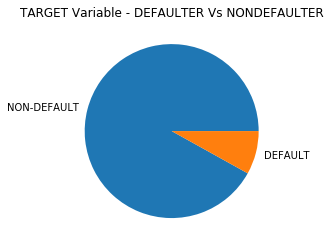

In [47]:
plt.pie(New_Applicant['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT','DEFAULT'])
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

#### divide the column into two dataframes like target = 0 is Non_defaulter and target = 1 is Defaulter

In [48]:
Non_Defaulter = New_Applicant.loc[New_Applicant["TARGET"]==0]
Defaulter = New_Applicant.loc[New_Applicant["TARGET"]==1]

In [49]:
Non_Defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE,AGE_G
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,Very_high,45,"(40, 45]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,52,"(50, 55]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,Medium,52,"(50, 55]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,54,"(50, 55]"
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,Laborers,2.0,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,Low,46,"(45, 50]"


In [50]:
Defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE,AGE_G
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,High,25,"(20, 25]"
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,Cooking staff,1.0,3,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,-161.0,0.0,0.0,0.0,0.0,2.0,2.0,Medium,51,"(50, 55]"
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,Laborers,2.0,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,-1075.0,0.0,0.0,0.0,2.0,0.0,4.0,High,47,"(45, 50]"
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,Sales staff,2.0,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,-1480.0,0.0,0.0,0.0,0.0,0.0,2.0,Medium,36,"(35, 40]"
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,-4199,NaN,2.0,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,67,"(65, 70]"


### 3.2 Perform univariate Analysis by using Target dataframe

### By using target dataframe try to plot the categorical univariate variables and look the insights from the graph 

#### Define common function(count_plot) for categorical univaraite analysis. 

### 3.2.1 For categorical unordered univariate analysis

In [51]:
def common_plot(data1):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize = (35,10))
    plt.rcParams["axes.labelsize"] = 25
    sns.countplot(data = Non_Defaulter,x = data1,ax = ax1)
    ax1.set_title(f'Distribution of {data1} for Non_Defaulters',fontsize = 35)
    ax1.set_xticklabels(ax1.get_xticklabels(),fontsize = 20,rotation = 40,ha = 'right')
    ax1.tick_params(axis='y', labelsize=20)
    
    
    sns.countplot(data = Defaulter,x = data1,ax = ax2)
    ax2.set_title(f'Distribution of {data1} for Defaulters',fontsize = 35)
    ax2.set_xticklabels(ax2.get_xticklabels(),fontsize = 20,rotation = 40,ha = 'right')
    ax2.tick_params(axis='y', labelsize=20)
    plt.show()

<Figure size 1440x2160 with 0 Axes>

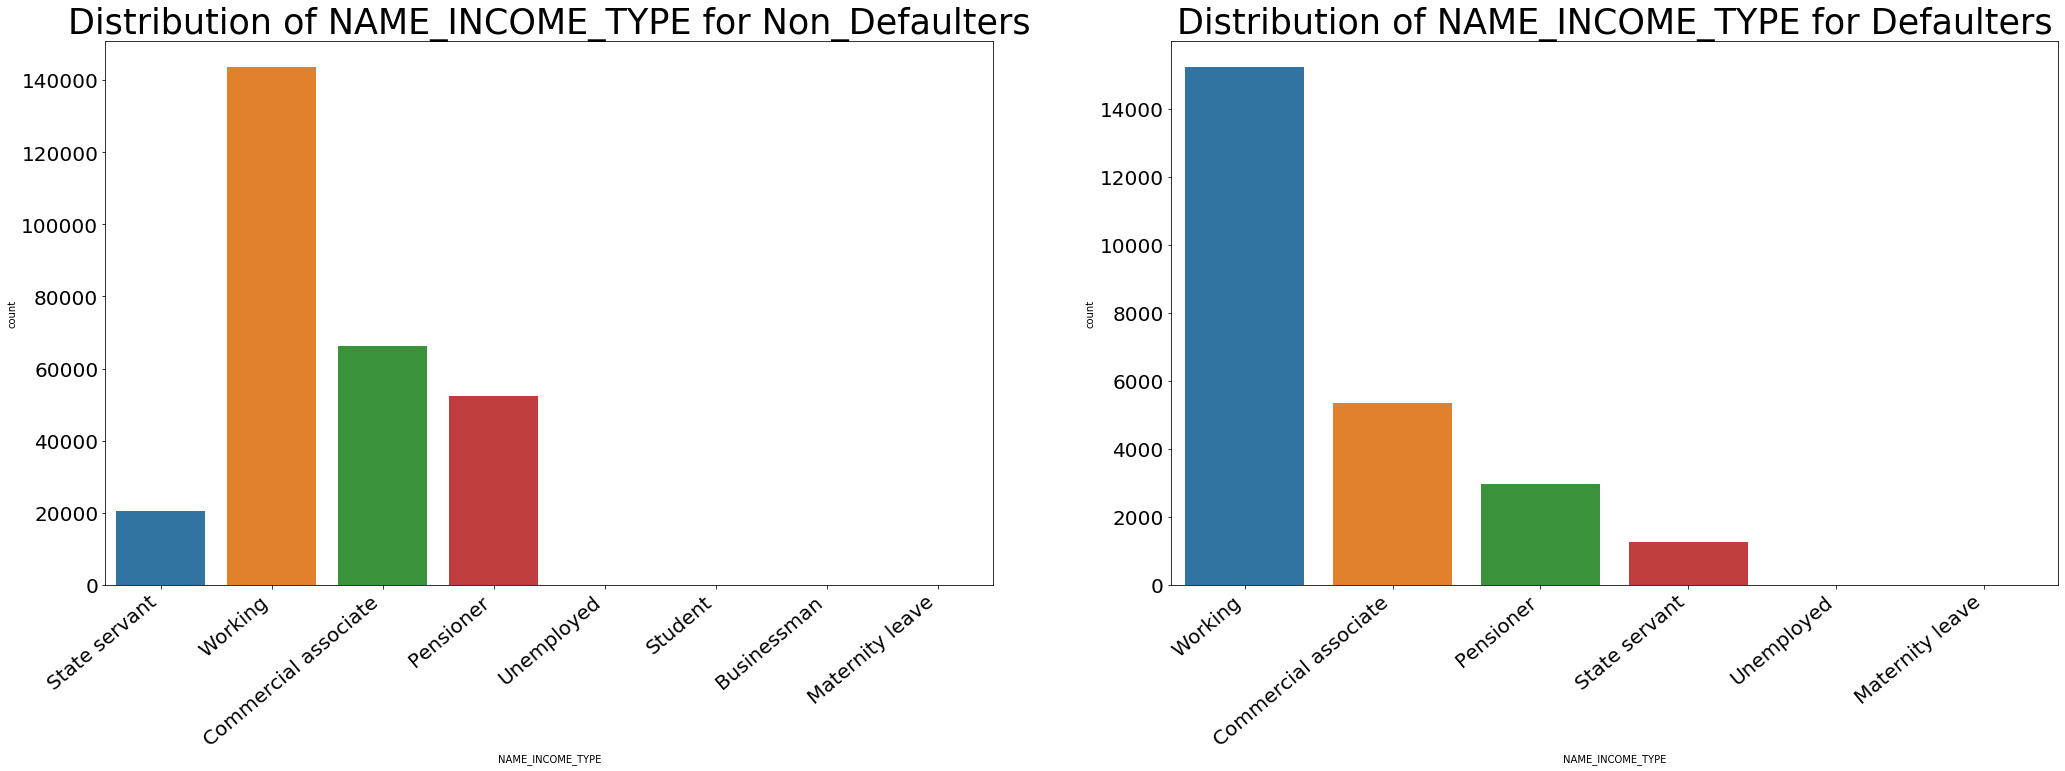

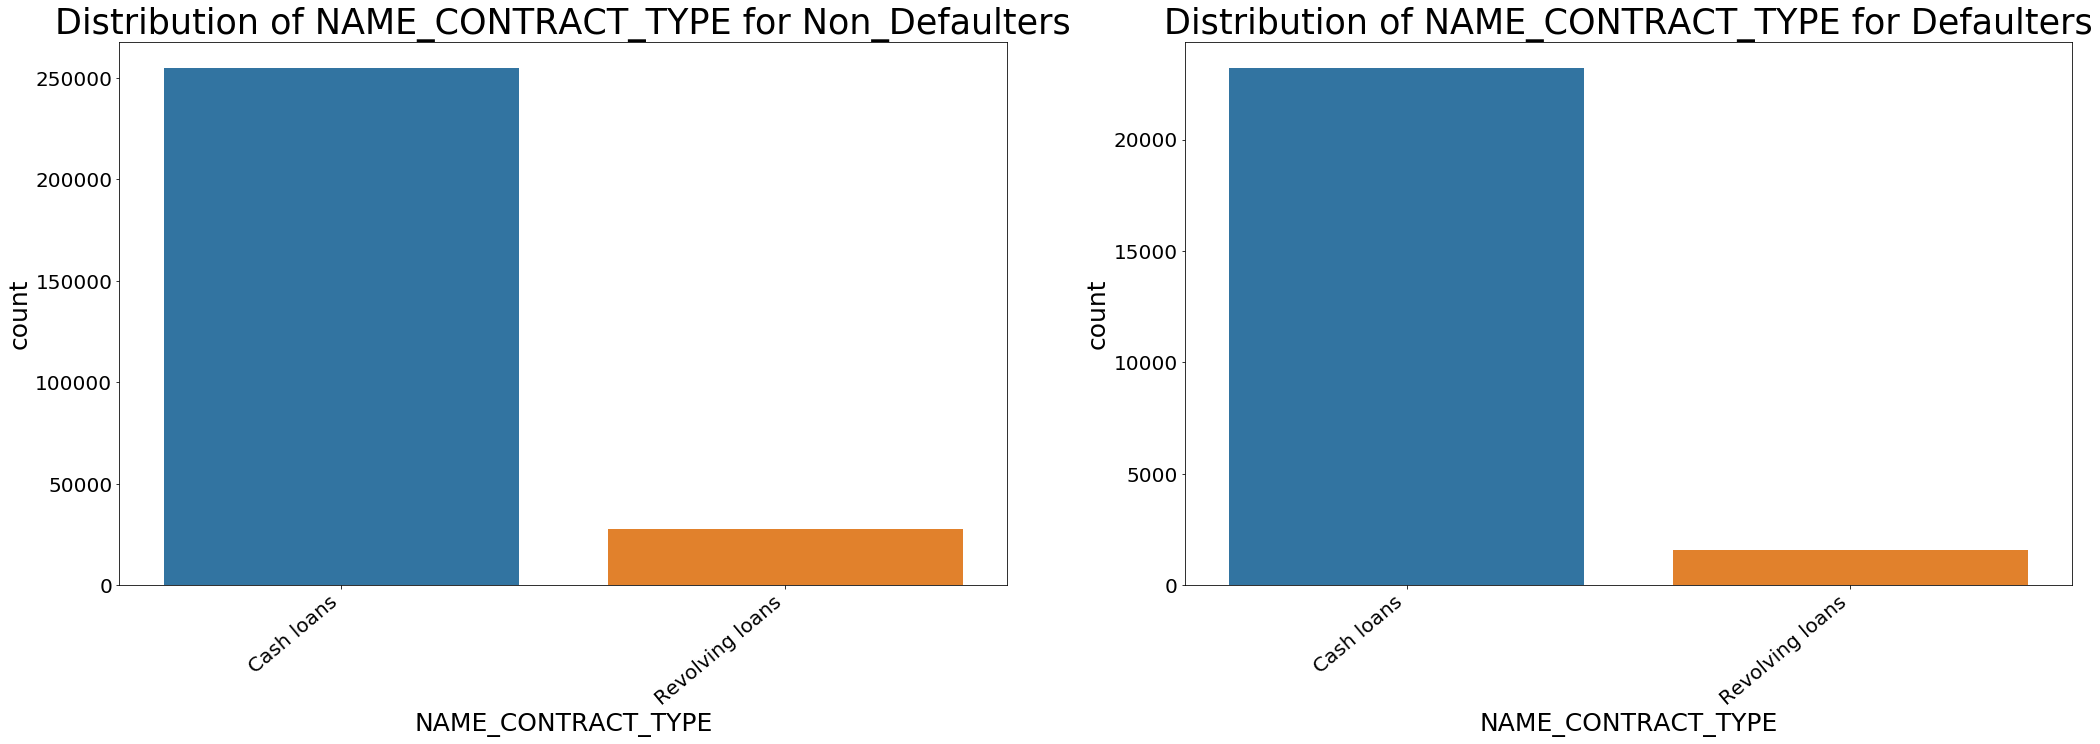

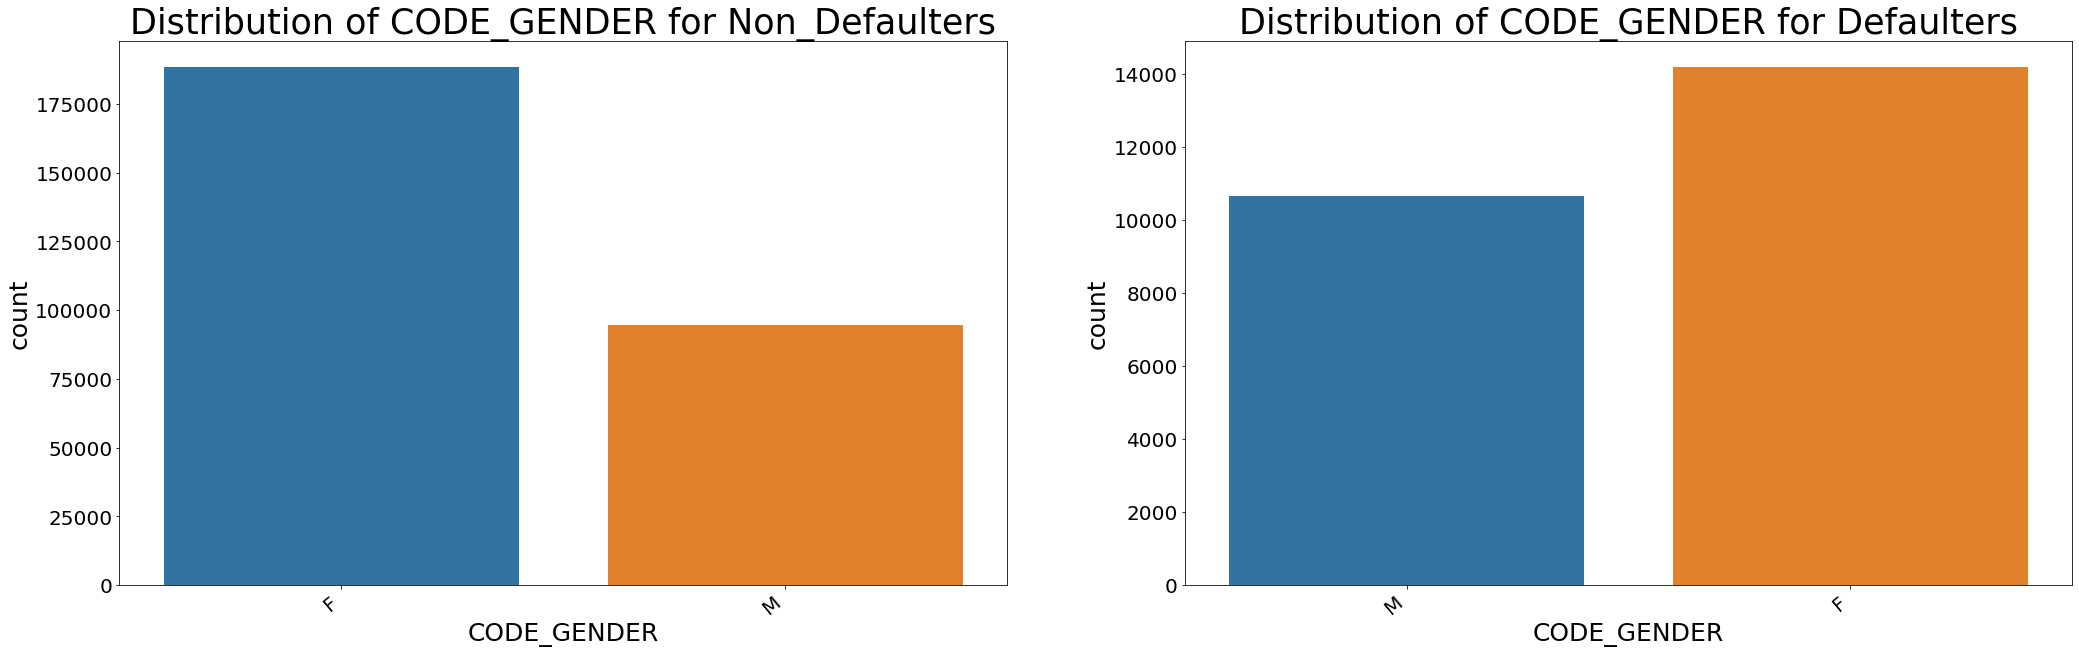

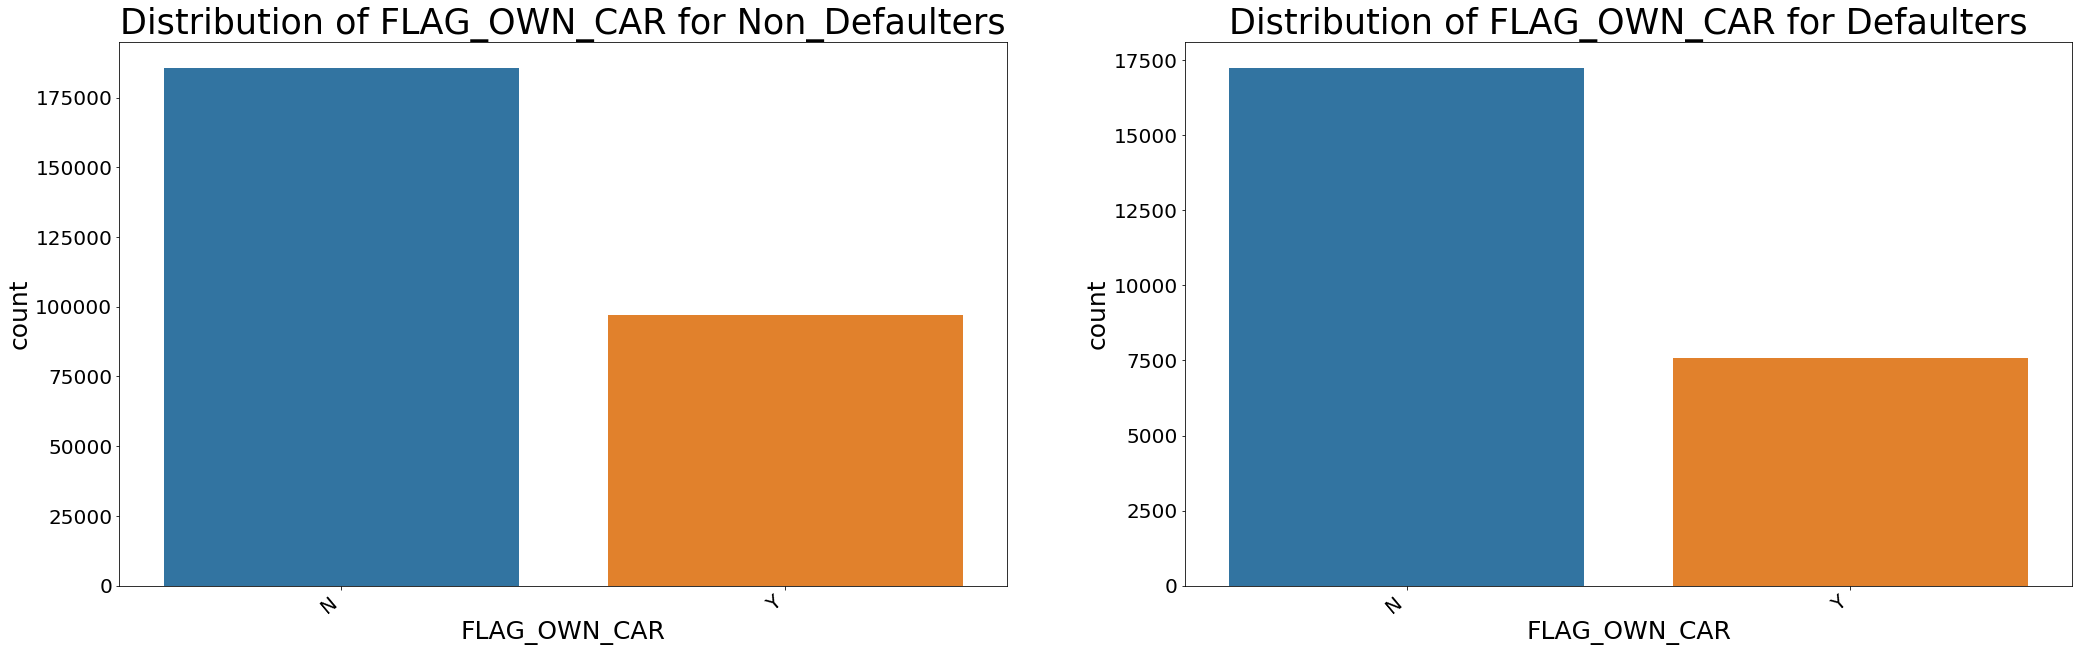

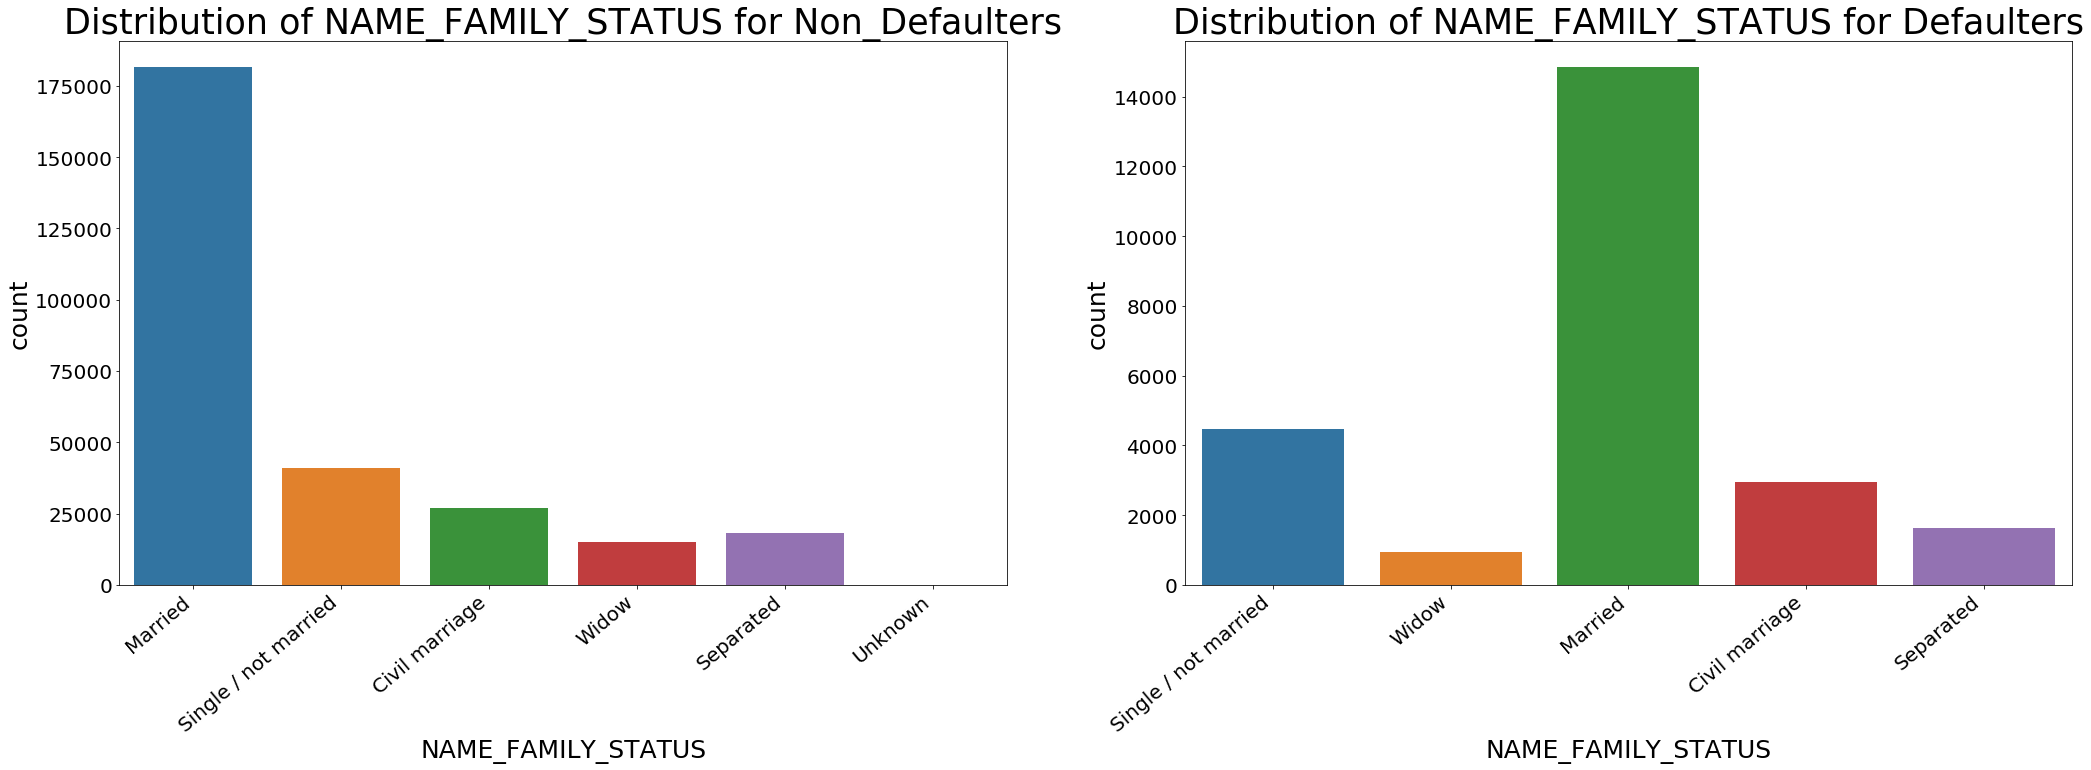

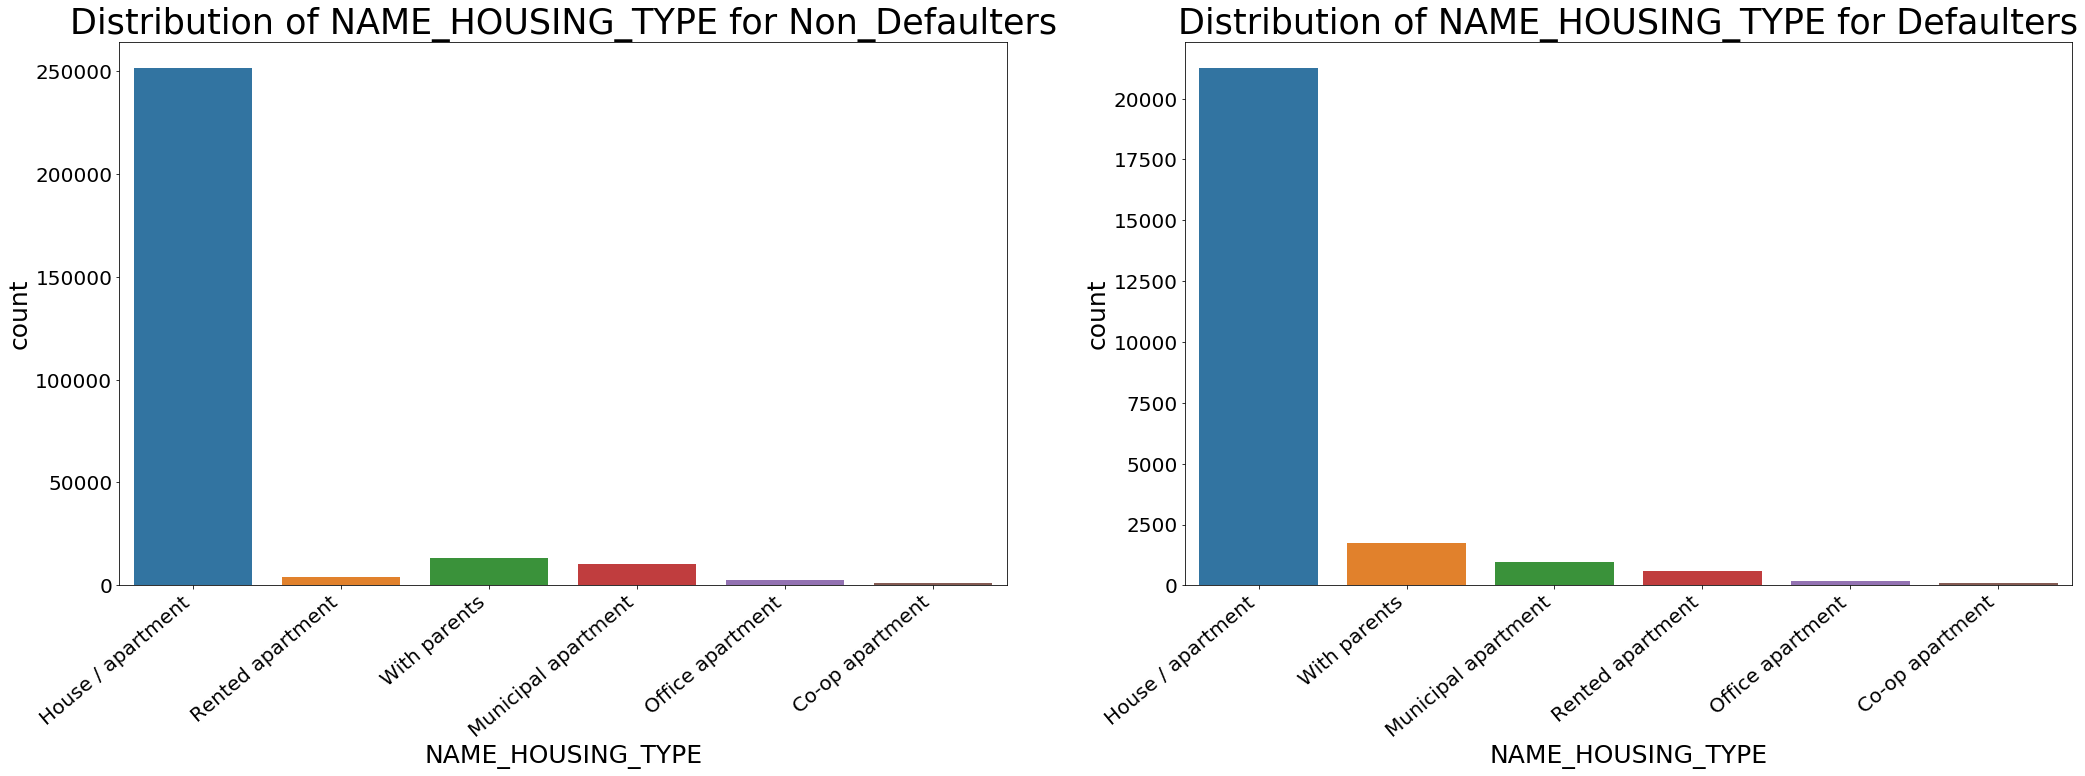

In [52]:
var = ['NAME_INCOME_TYPE','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
plt.figure(figsize=(20,30))
for x in var:
    common_plot(x)

##### Note['NAME_INCOME_TYPE']: As we can see from above graph, mostly working candidates will apply for loan.And there are so many non_defaulters from working candidates only. coming to defaulters side it was high than others working candidates will not pay loan as per time.

##### Note['NAME_CONTRACT_TYPE']: from above insights female candidates will take loan more than the male candidates. defaulters side females has higher chances of not paying loan as per time.

#### Note['CODE_GENDER']:from above insights married candidates have highest range than other candidates. Married candidates has higher chances of not paying loan intime.

#### Note: From above insights house and apartments candidates have high chances to take loans

### 3.2.2 For categorical ordered univariate analysis 

<Figure size 1440x2160 with 0 Axes>

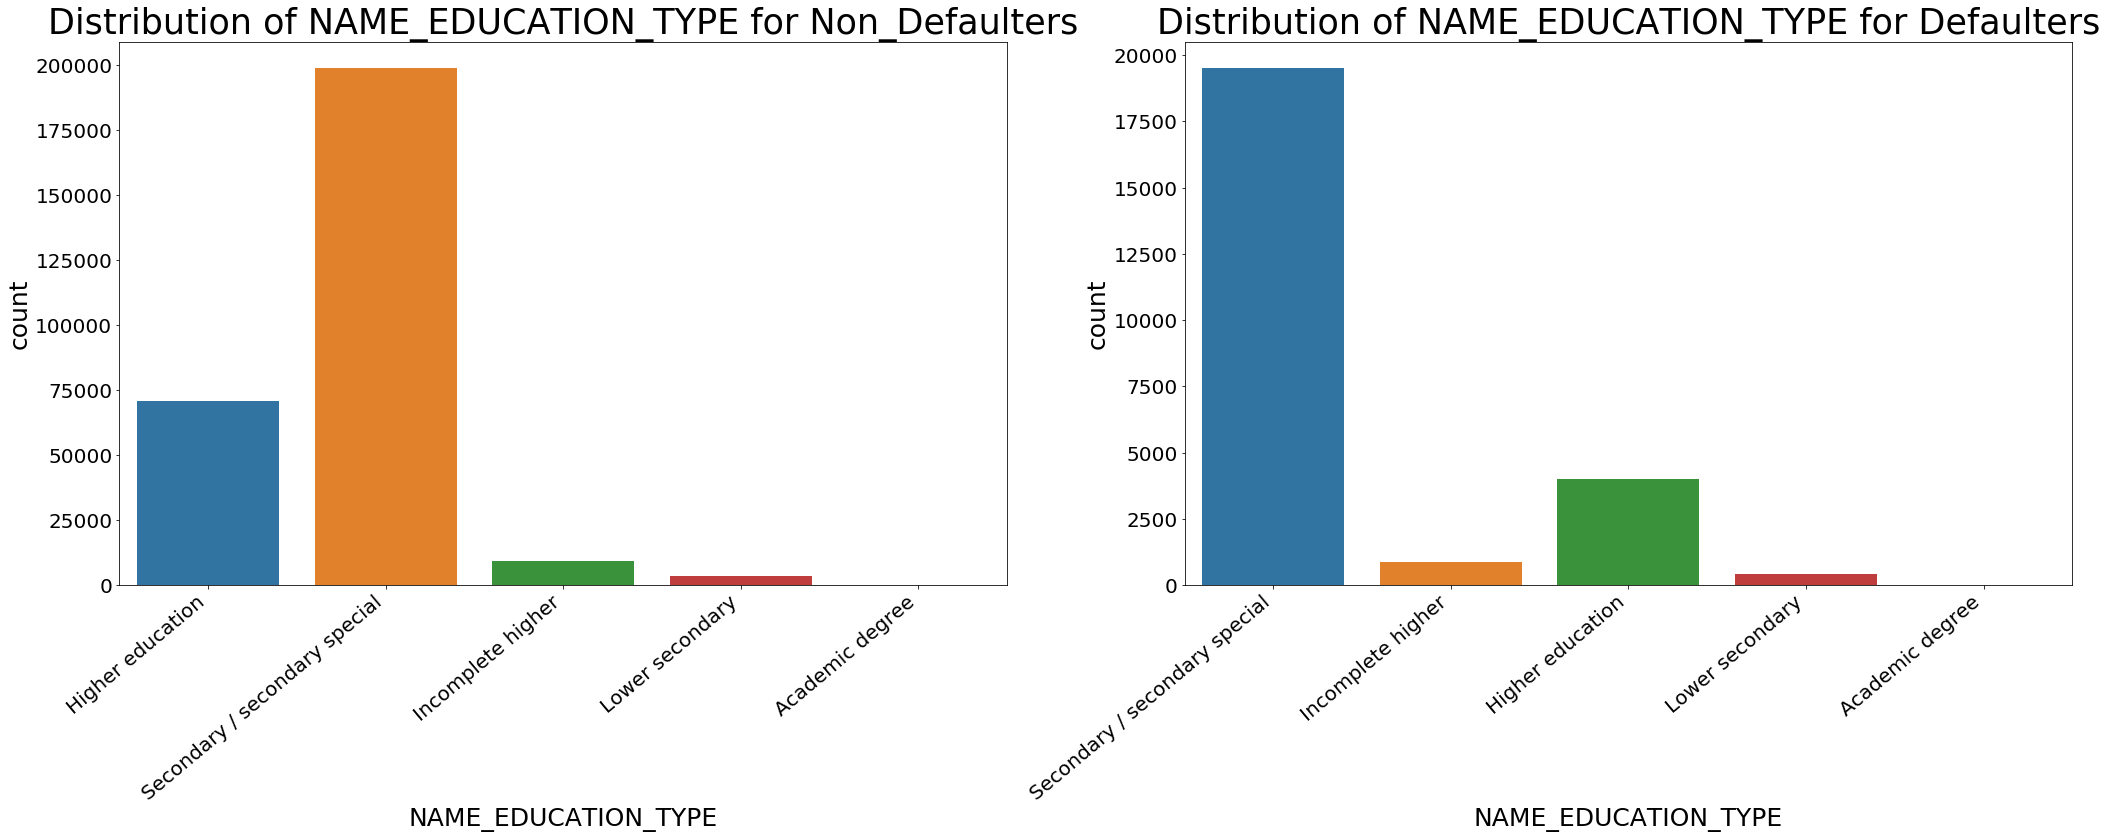

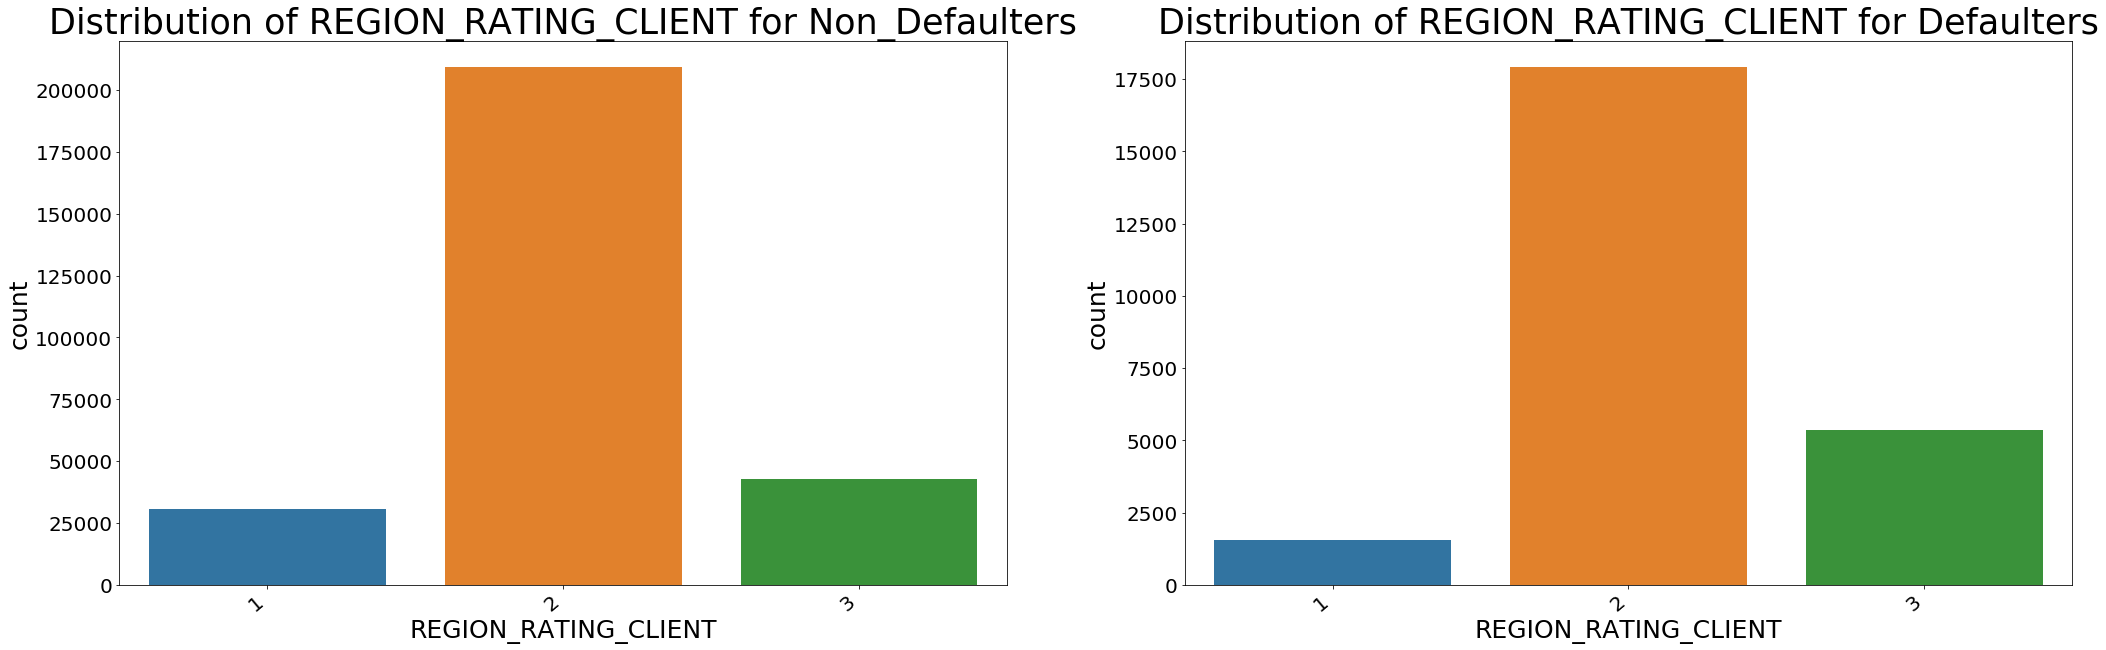

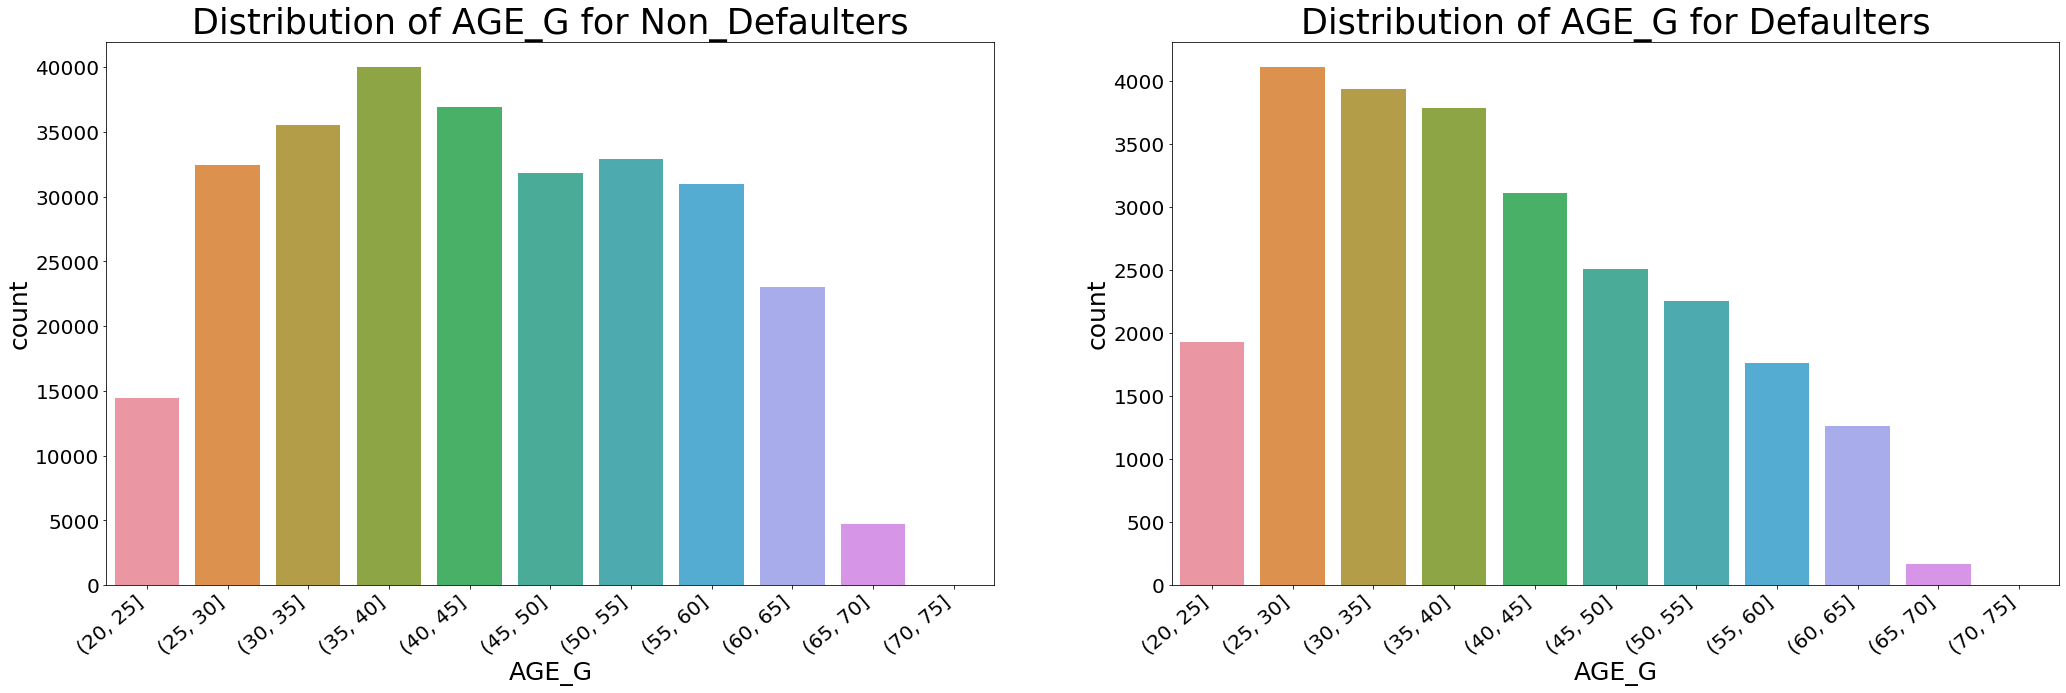

In [53]:
# plot the graph for education type

cat_var = ['NAME_EDUCATION_TYPE','REGION_RATING_CLIENT',"AGE_G"]
plt.figure(figsize=(20,30))
for x in cat_var:
    common_plot(x)

* secondary/secondary special is high in both target dataframes

* for defaulters and non_defaulters rating 3 is high

* from above insights for non_defaulters from age 25 to 40 is high
* for defaulters from age 25 to 30 is high 

### 3.3 categorical unordered univariate analysis

### For organizantion type categorical unordered univariate analysis

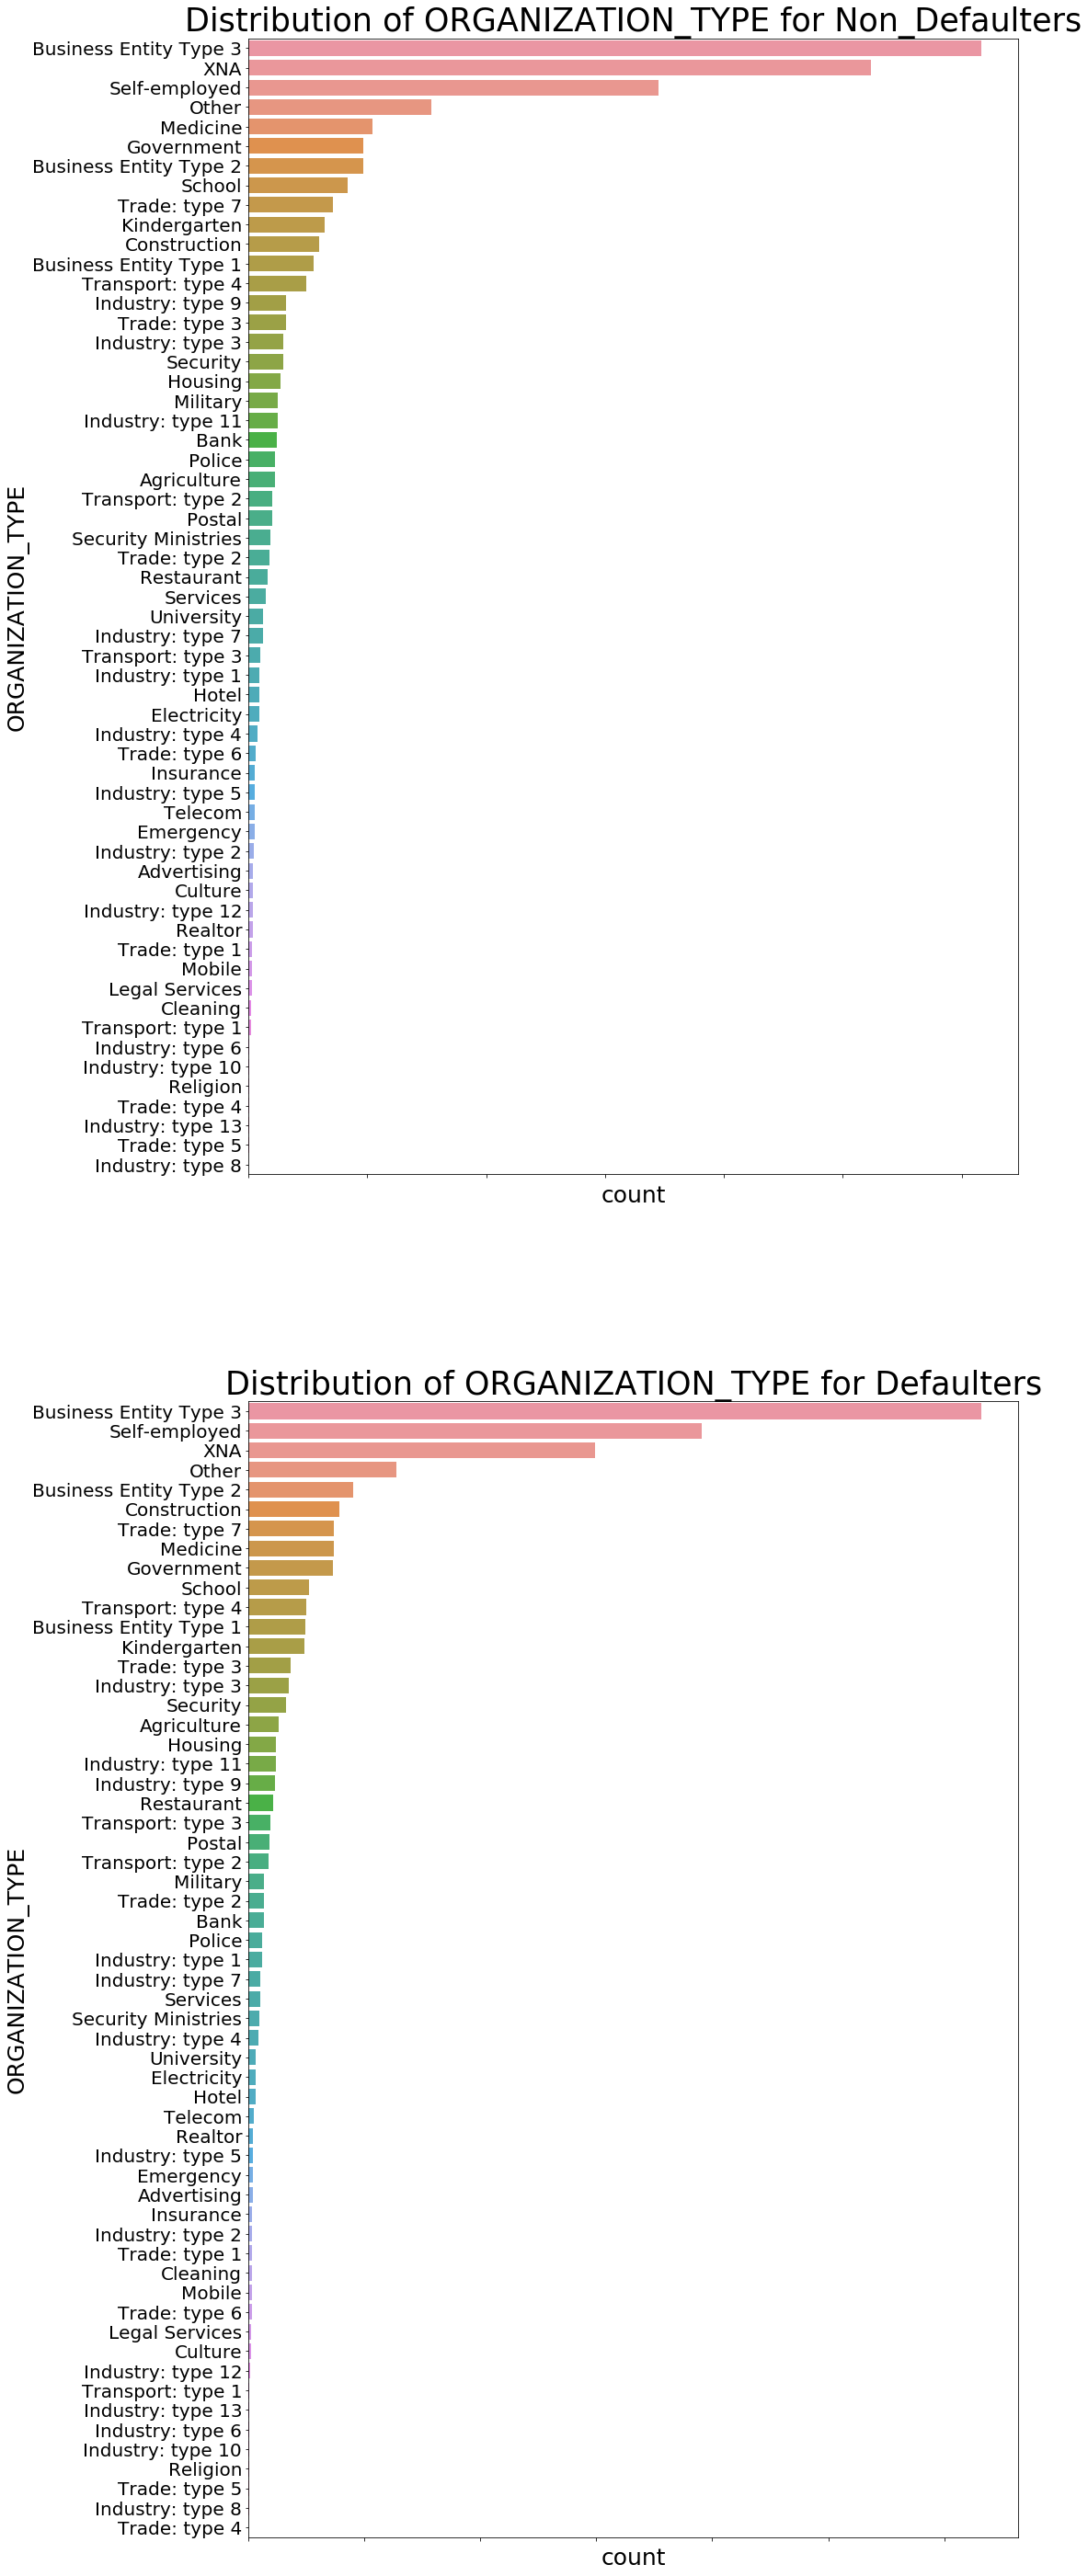

In [54]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (15,50))
sns.countplot(data = Non_Defaulter, y = 'ORGANIZATION_TYPE', order = Non_Defaulter['ORGANIZATION_TYPE'].value_counts().index, ax = ax1)
ax1.set_title(f'Distribution of ORGANIZATION_TYPE for Non_Defaulters',fontsize = 35)
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize = 20,rotation = 90,ha = 'right')
ax1.tick_params(axis='y', labelsize=20)
    
    
sns.countplot(data = Defaulter, y = 'ORGANIZATION_TYPE', order = Defaulter['ORGANIZATION_TYPE'].value_counts().index, ax = ax2)
ax2.set_title(f'Distribution of ORGANIZATION_TYPE for Defaulters',fontsize = 35)
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize = 20,rotation = 90,ha = 'right')
ax2.tick_params(axis='y', labelsize=20)
plt.show()

#### from above graph Business Entity Type 3 has higher chances than other types

### 3.4 Plot the graph for continuos univaraite analysis

In [55]:
def conti_group(data1):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(Non_Defaulter[data1],ax=ax1)
    ax1.set_title(f'Distribution of {data1} for Non-Defaulters',fontsize=15)
    
    sns.distplot(Defaulter[data1],ax=ax2)
    ax2.set_title(f'Distribution of {data1} for Defaulters',fontsize=15)
    plt.show()

<Figure size 1440x2160 with 0 Axes>

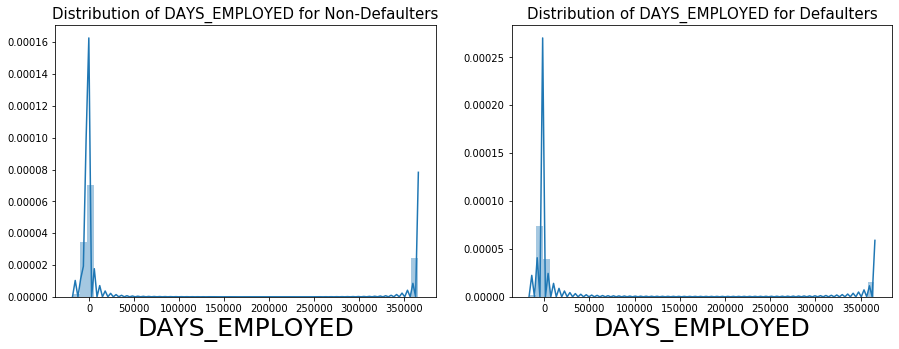

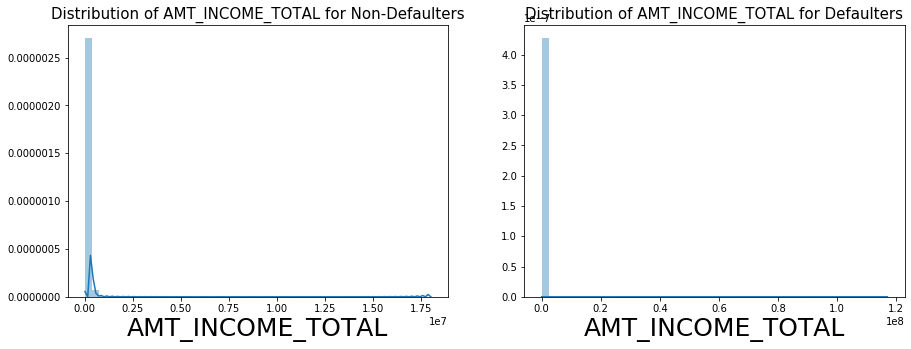

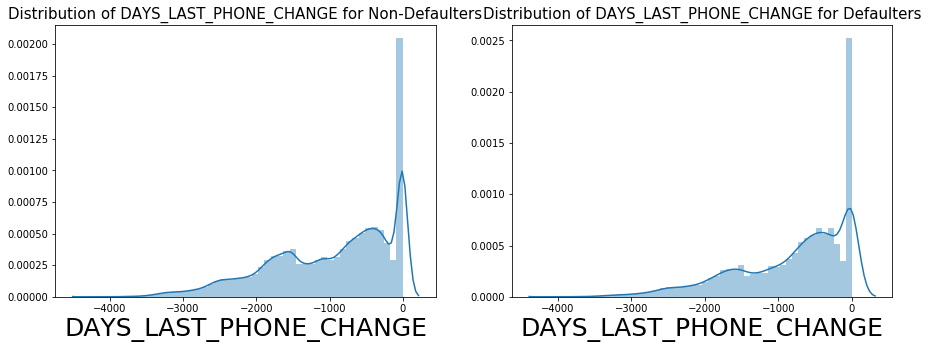

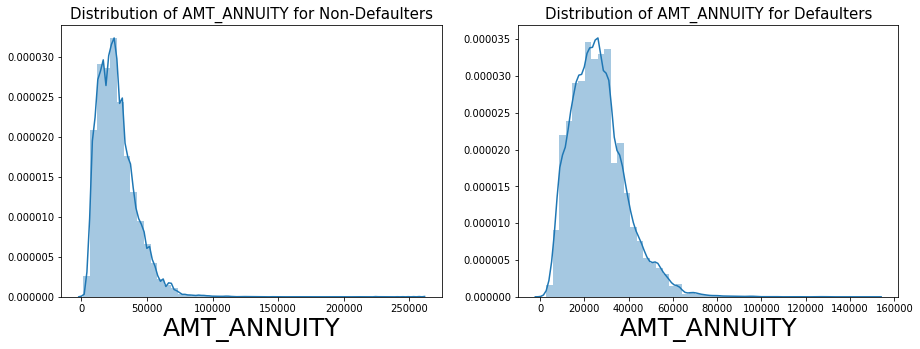

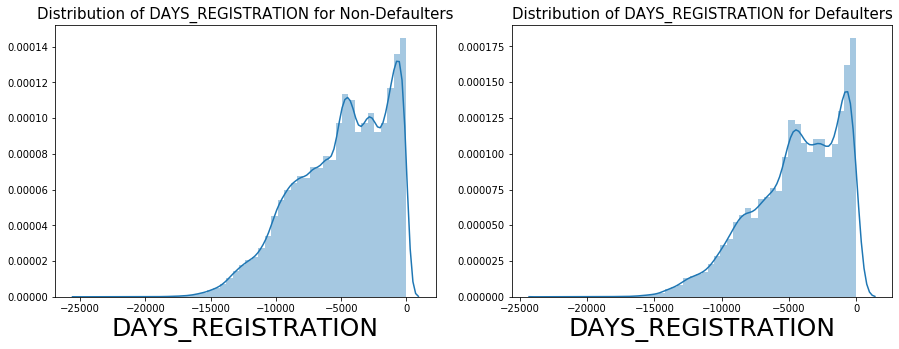

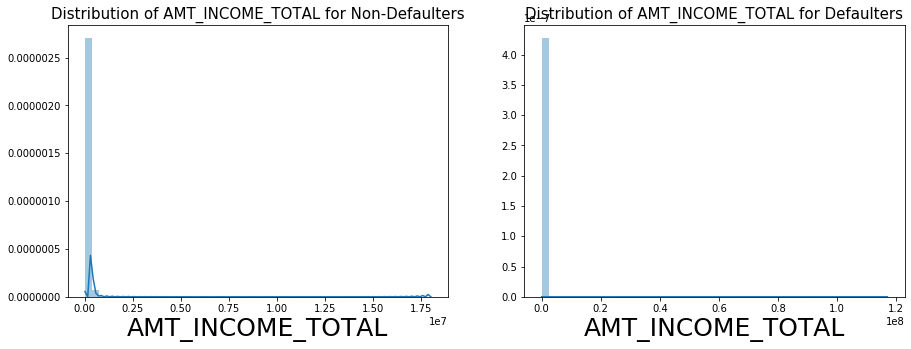

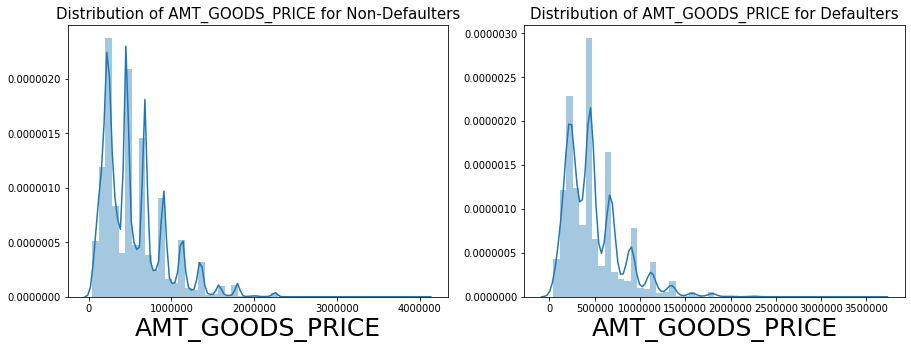

In [56]:
con_var = ['DAYS_EMPLOYED','AMT_INCOME_TOTAL','DAYS_LAST_PHONE_CHANGE','AMT_ANNUITY','DAYS_REGISTRATION','AMT_INCOME_TOTAL','AMT_GOODS_PRICE']
plt.figure(figsize=(20,30))
for x in con_var:
    conti_group(x)

## 4.1 plot the bivariate analysis

### 4.1.1 Plot the bivariate analysis for continous - continous variable

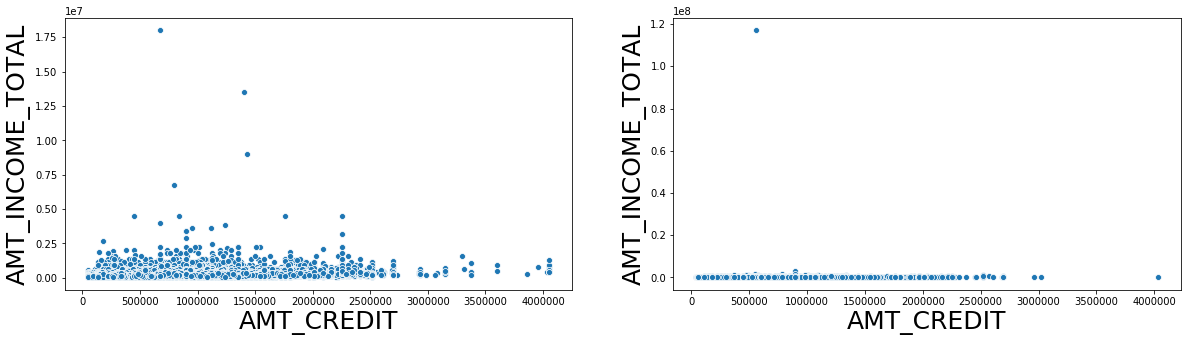

In [57]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (20,5)) 
sns.scatterplot(x='AMT_CREDIT', y='AMT_INCOME_TOTAL',data=Non_Defaulter,ax=ax1)
sns.scatterplot(x='AMT_CREDIT', y='AMT_INCOME_TOTAL',data=Defaulter,ax=ax2)
plt.show()


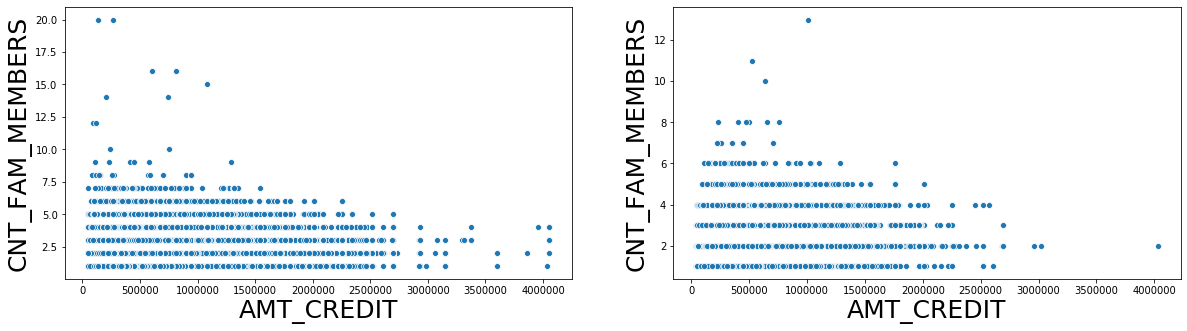

In [58]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (20,5)) 
sns.scatterplot(x='AMT_CREDIT', y='CNT_FAM_MEMBERS',data=Non_Defaulter,ax=ax1)
sns.scatterplot(x='AMT_CREDIT', y='CNT_FAM_MEMBERS',data=Defaulter,ax=ax2)
plt.show()

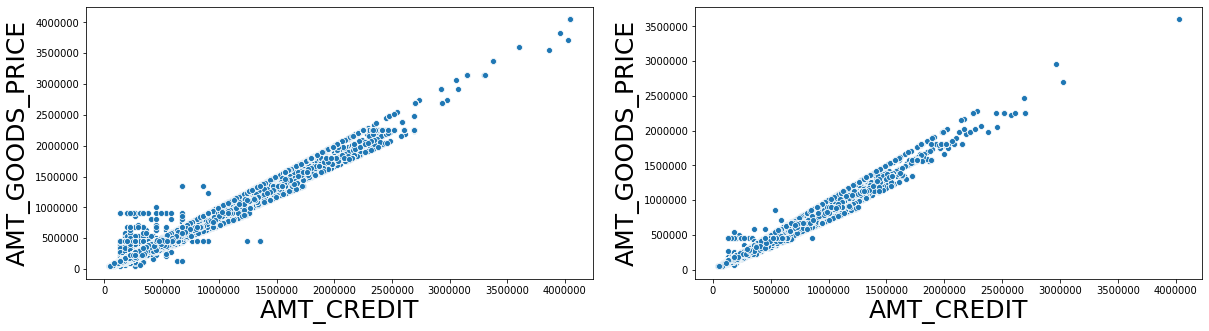

In [59]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (20,5)) 
sns.scatterplot(x='AMT_CREDIT', y='AMT_GOODS_PRICE',data=Non_Defaulter,ax=ax1)
sns.scatterplot(x='AMT_CREDIT', y='AMT_GOODS_PRICE',data=Defaulter,ax=ax2)
plt.show()

### 4.1.2 plot the bivariate analysis for categorical - continous variable 

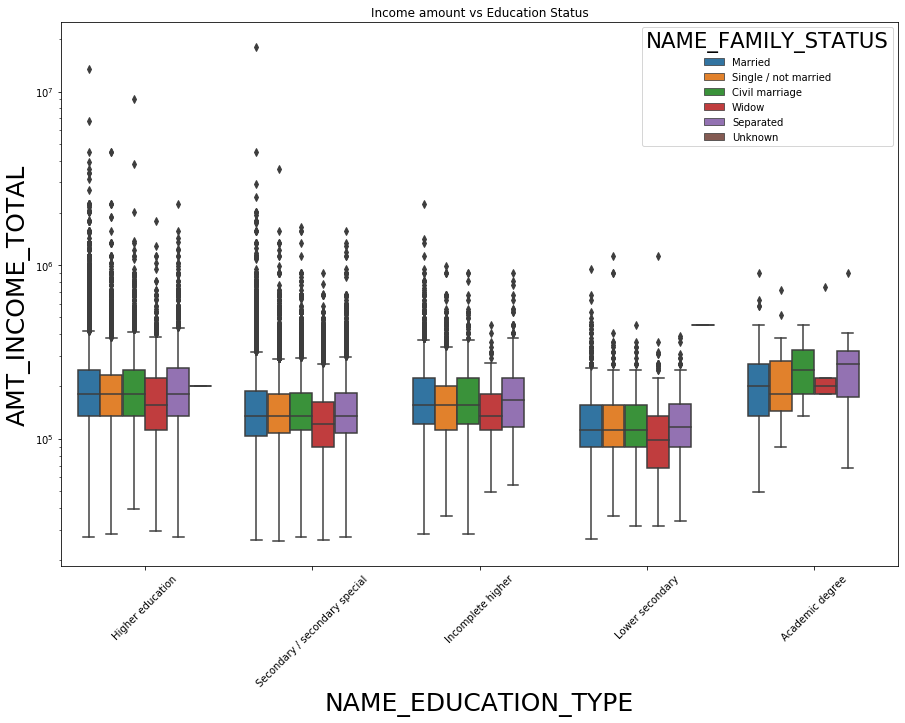

In [60]:
plt.figure(figsize = (15,10))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data = Non_Defaulter, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')

plt.title('Income amount vs Education Status')
plt.show()


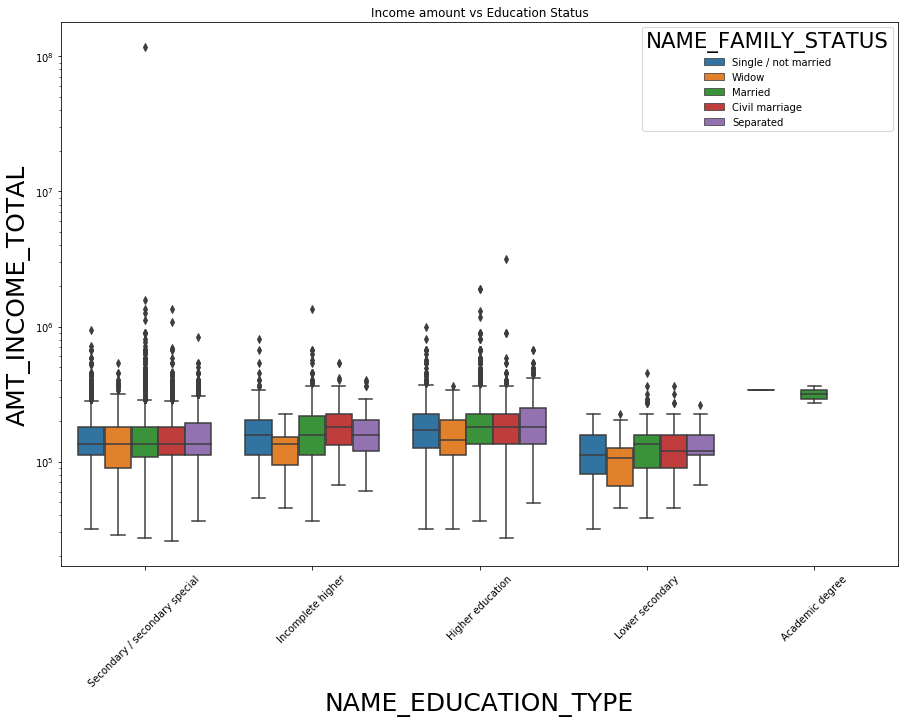

In [61]:
plt.figure(figsize = (15,10))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data = Defaulter, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')

plt.title('Income amount vs Education Status')
plt.show()

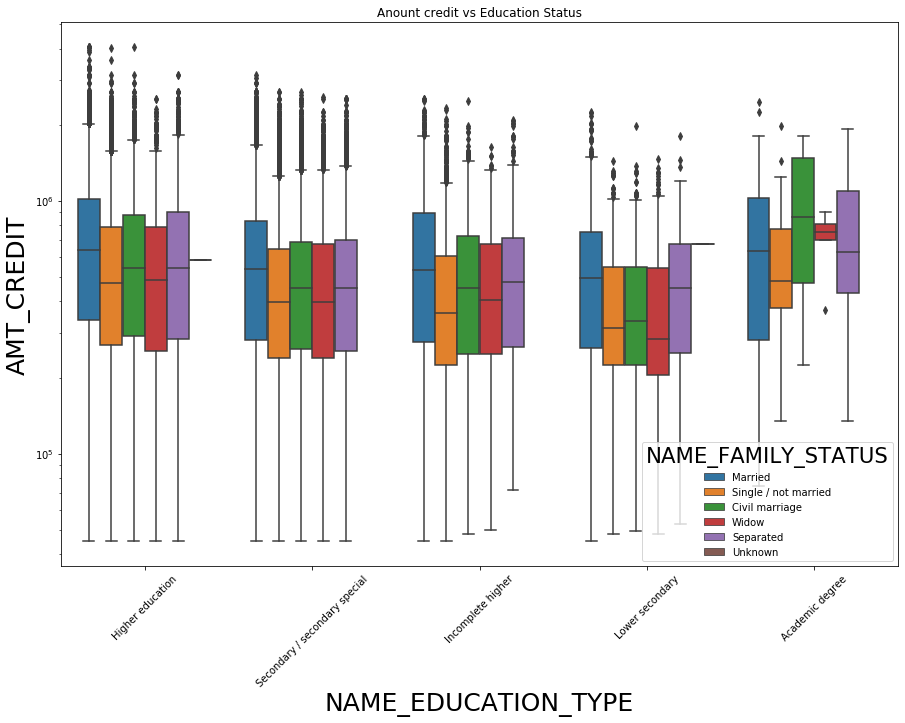

In [62]:
plt.figure(figsize = (15,10))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data = Non_Defaulter, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')

plt.title('Anount credit vs Education Status')
plt.show()

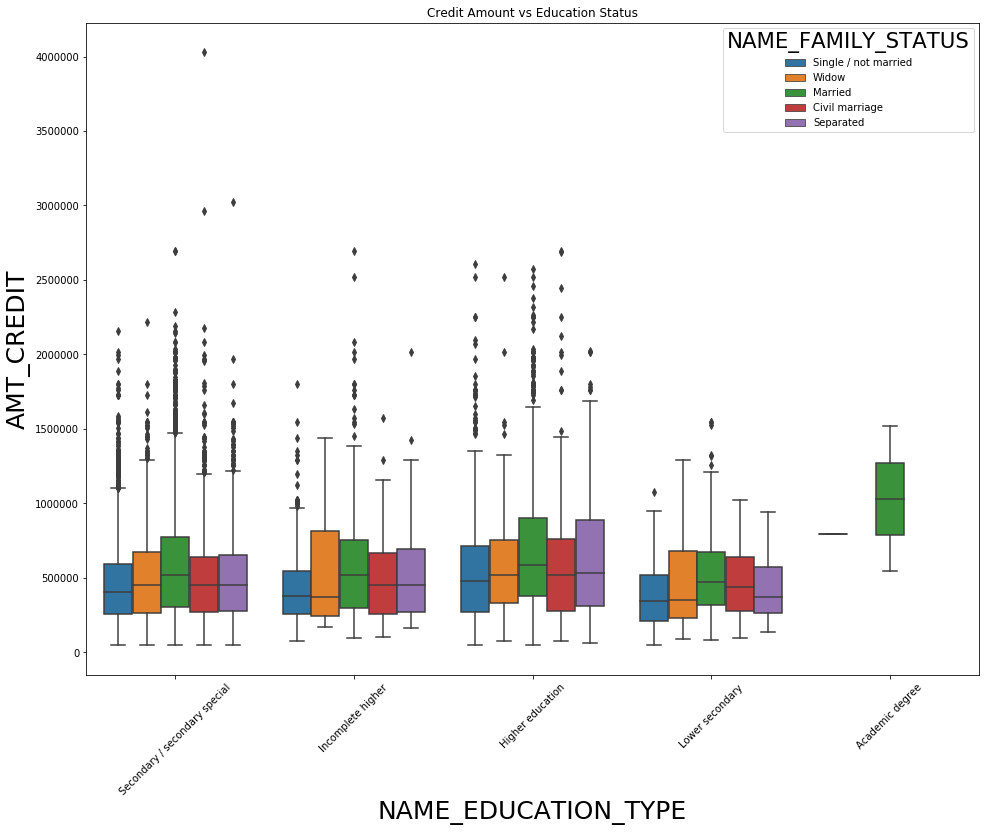

In [63]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data = Defaulter, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()


## 5.1 Find  correlation for numeric columns for both target 0 and 1  

In [64]:
target0_corr = Non_Defaulter.iloc[0:,2:]
target1_corr = Defaulter.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [65]:
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
CNT_CHILDREN,1.000000,0.038314,0.002323,0.024777,-0.001306,-0.025559,0.375639,-1.612334e-01,0.180505,-0.019981,0.810515,0.019543,0.001712,-0.010738,0.015457,0.021525,0.027790,0.076217,0.071589,-0.016829,-0.046223,0.022537,-0.001282,2.220438e-02,-0.001741,-0.009670,0.001279,0.000760,-0.001293,-0.001254,-0.007712,-0.044229,-0.375602
AMT_INCOME_TOTAL,0.038314,1.000000,0.416021,0.485695,0.419721,0.097765,0.093514,-1.745335e-01,0.076393,0.035931,0.044989,-0.209529,0.102383,0.078373,0.161444,0.148978,0.020370,0.040091,0.040325,0.179784,-0.094706,-0.028993,-0.032770,-2.872938e-02,-0.033961,-0.063205,0.002693,0.006027,0.009408,0.073698,0.027418,0.061551,-0.093430
AMT_CREDIT,0.002323,0.416021,1.000000,0.831884,0.984998,0.053574,-0.057150,-1.204063e-01,0.009419,-0.001986,0.079504,-0.087613,0.051374,0.019092,0.045429,0.047739,-0.026650,-0.012666,0.006969,0.128457,0.018904,0.003043,-0.015646,3.119282e-03,-0.018723,-0.077380,-0.003655,0.000361,-0.004834,0.045463,0.024423,-0.035042,0.057164
AMT_ANNUITY,0.024777,0.485695,0.831884,1.000000,0.829801,0.058595,0.011742,-1.297809e-01,0.037720,0.016565,0.096432,-0.116836,0.054194,0.035818,0.075772,0.073041,-0.004964,0.009714,0.019447,0.129409,0.014982,-0.009436,-0.018552,-9.210220e-03,-0.020812,-0.068002,0.003495,0.002631,0.011849,0.050670,0.022422,0.001123,-0.011727
AMT_GOODS_PRICE,-0.001306,0.419721,0.984998,0.829801,1.000000,0.062629,-0.058343,-1.221618e-01,0.009507,-0.004046,0.079339,-0.089748,0.058862,0.020404,0.046367,0.048043,-0.028155,-0.015469,0.004664,0.136657,0.024045,0.002435,-0.016725,2.548377e-03,-0.019403,-0.082188,-0.002794,0.000615,-0.004279,0.046311,0.025153,-0.037109,0.058352
REGION_POPULATION_RELATIVE,-0.025559,0.097765,0.053574,0.058595,0.062629,1.000000,-0.030745,-2.569827e-03,-0.036694,-0.010467,-0.017721,-0.426032,0.128226,-0.019921,0.029208,0.051197,-0.045542,-0.029344,-0.005470,0.185811,-0.005880,0.011852,0.028500,1.241411e-02,0.023805,-0.036488,-0.004554,-0.000729,-0.004796,0.048534,-0.001187,0.004859,0.030816
DAYS_BIRTH,0.375639,0.093514,-0.057150,0.011742,-0.058343,-0.030745,1.000000,-2.341764e-01,0.298121,0.261975,0.282405,0.003182,0.098430,0.066379,0.096424,0.070068,0.180956,0.239120,0.156594,-0.088911,-0.196950,0.021743,0.000461,2.136902e-02,0.002344,0.067584,0.004558,0.002877,-0.001633,0.013086,-0.011586,-0.061846,-0.999723
DAYS_EMPLOYED,-0.161233,-0.174534,-0.120406,-0.129781,-0.122162,-0.002570,-0.234176,1.000000e+00,-0.037309,-0.117623,-0.177291,0.013888,-0.049100,0.021747,-0.010353,-0.019507,0.022424,-0.083236,-0.098685,-0.081733,-0.009527,-0.000147,0.018692,-1.008616e-07,0.016899,0.128103,-0.005405,0.000664,0.000800,-0.042594,0.015134,0.012890,0.234231
DAYS_REGISTRATION,0.180505,0.076393,0.009419,0.037720,0.009507,-0.036694,0.298121,-3.730911e-02,1.000000,0.094152,0.159033,0.073316,-0.008485,0.025939,0.032724,0.024164,0.055309,0.085869,0.062445,-0.058970,-0.101764,0.013420,0.002398,1.326606e-02,0.003560,0.051923,-0.003547,-0.001472,-0.002518,-0.006146,-0.000073,-0.021567,-0.297984
DAYS_ID_PUBLISH,-0.019981,0.035931,-0.001986,0.016565,-0.004046,-0.010467,0.261975,-1.176229e-01,0.094152,1.000000,-0.014031,-0.010029,0.039756,0.035392,0.049195,0.034776,0.077360,0.101051,0.062976,-0.043095,-0.126579,-0.004128,0.001985,-4.689719e-03,0.004623,0.070421,0.004817,-0.000098,-0.002463,-0.007973,-0.010711

In [66]:
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
CNT_CHILDREN,1.000000,-0.004749,0.000200,0.033679,-0.007564,-0.031628,0.267862,-0.116332,0.133658,-0.027320,0.823307,0.041631,-0.022469,-0.025824,-0.019571,-0.009823,0.004127,0.047486,0.051352,-0.015957,-0.022055,0.032070,-0.003351,0.031274,-0.005607,0.012812,0.000564,-0.011009,-0.004516,-0.013416,-0.015320,-0.036691,-0.267732
AMT_INCOME_TOTAL,-0.004749,1.000000,0.359276,0.431617,0.362476,0.051463,-0.007238,-0.117761,0.036671,-0.005929,0.003867,-0.157085,0.088174,0.076449,0.156053,0.144970,0.008996,0.027994,0.030864,0.145612,-0.067438,0.000630,-0.019355,0.000674,-0.023345,-0.081241,0.010661,-0.002371,0.018841,0.079795,0.025086,0.081913,0.007043
AMT_CREDIT,0.000200,0.359276,1.000000,0.811443,0.976430,0.039919,-0.155216,-0.083601,-0.017099,-0.053780,0.067447,-0.047654,0.028537,0.014192,0.030331,0.032564,-0.028544,-0.029571,-0.011182,0.112157,0.072975,0.018355,-0.021987,0.018215,-0.029011,-0.098580,0.002944,-0.004877,0.002992,0.044705,-0.019015,-0.026472,0.154981
AMT_ANNUITY,0.033679,0.431617,0.811443,1.000000,0.804099,0.023297,-0.030483,-0.096587,0.035900,-0.014472,0.088604,-0.057905,0.032083,0.030930,0.063880,0.062370,-0.002849,0.007397,0.014922,0.110581,0.037340,0.007430,-0.020239,0.008253,-0.026831,-0.074302,0.014390,-0.004444,0.030202,0.065508,-0.003439,-0.005174,0.030219
AMT_GOODS_PRICE,-0.007564,0.362476,0.976430,0.804099,1.000000,0.054091,-0.157714,-0.086181,-0.019180,-0.059710,0.064608,-0.056469,0.040018,0.016967,0.033713,0.034974,-0.030196,-0.032537,-0.012539,0.123895,0.078733,0.020301,-0.019479,0.020180,-0.026180,-0.110539,0.006148,-0.005004,0.003654,0.047975,-0.015987,-0.026230,0.157556
REGION_POPULATION_RELATIVE,-0.031628,0.051463,0.039919,0.023297,0.054091,1.000000,-0.046398,-0.003635,-0.034315,-0.023668,-0.022721,-0.333042,0.105989,-0.032472,-0.009009,0.010621,-0.057083,-0.044331,-0.016447,0.145540,-0.012031,0.031010,0.048992,0.030717,0.039026,-0.041326,-0.005804,0.000816,-0.002187,0.049689,-0.014709,0.008659,0.046163
DAYS_BIRTH,0.267862,-0.007238,-0.155216,-0.030483,-0.157714,-0.046398,1.000000,-0.107174,0.232940,0.251626,0.172208,0.035383,0.065810,0.055835,0.064540,0.039911,0.165372,0.203415,0.108966,-0.120587,-0.168203,0.006410,0.011838,0.005937,0.013496,0.100163,0.015904,0.001271,-0.003331,0.005324,-0.010736,-0.080880,-0.999646
DAYS_EMPLOYED,-0.116332,-0.117761,-0.083601,-0.096587,-0.086181,-0.003635,-0.107174,1.000000,-0.017716,-0.049799,-0.144711,-0.000563,-0.027246,0.037032,0.016830,0.002150,0.046567,-0.025656,-0.055327,-0.071735,-0.012195,-0.025394,0.007078,-0.025721,0.010226,0.145979,0.003651,0.019698,0.011642,-0.029395,0.016947,-0.027963,0.107583
DAYS_REGISTRATION,0.133658,0.036671,-0.017099,0.035900,-0.019180,-0.034315,0.232940,-0.017716,1.000000,0.095750,0.126736,0.096914,-0.032019,0.015237,0.014323,0.010359,0.033891,0.071324,0.052747,-0.069859,-0.078971,0.021190,0.010782,0.020920,0.008554,0.057693,-0.001959,-0.003078,0.004176,0.013722,-0.007161,-0.010568,-0.232902
DAYS_ID_PUBLISH,-0.027320,-0.005929,-0.053780,-0.014472,-0.059710,-0.023668,0.251626,-0.049799,0.095750,1.000000,-0.029132,0.002648,0.026347,0.032654,0.032845,0.019967,0.068605,0.070867,0.031407,-0.060953,-0.126898,-0.013576,0.007839,-0.013002,0.006706,0.102175,0.002735,-0.013353,0.003583,-0.009518,0.008408,-0.044789,-0.251014


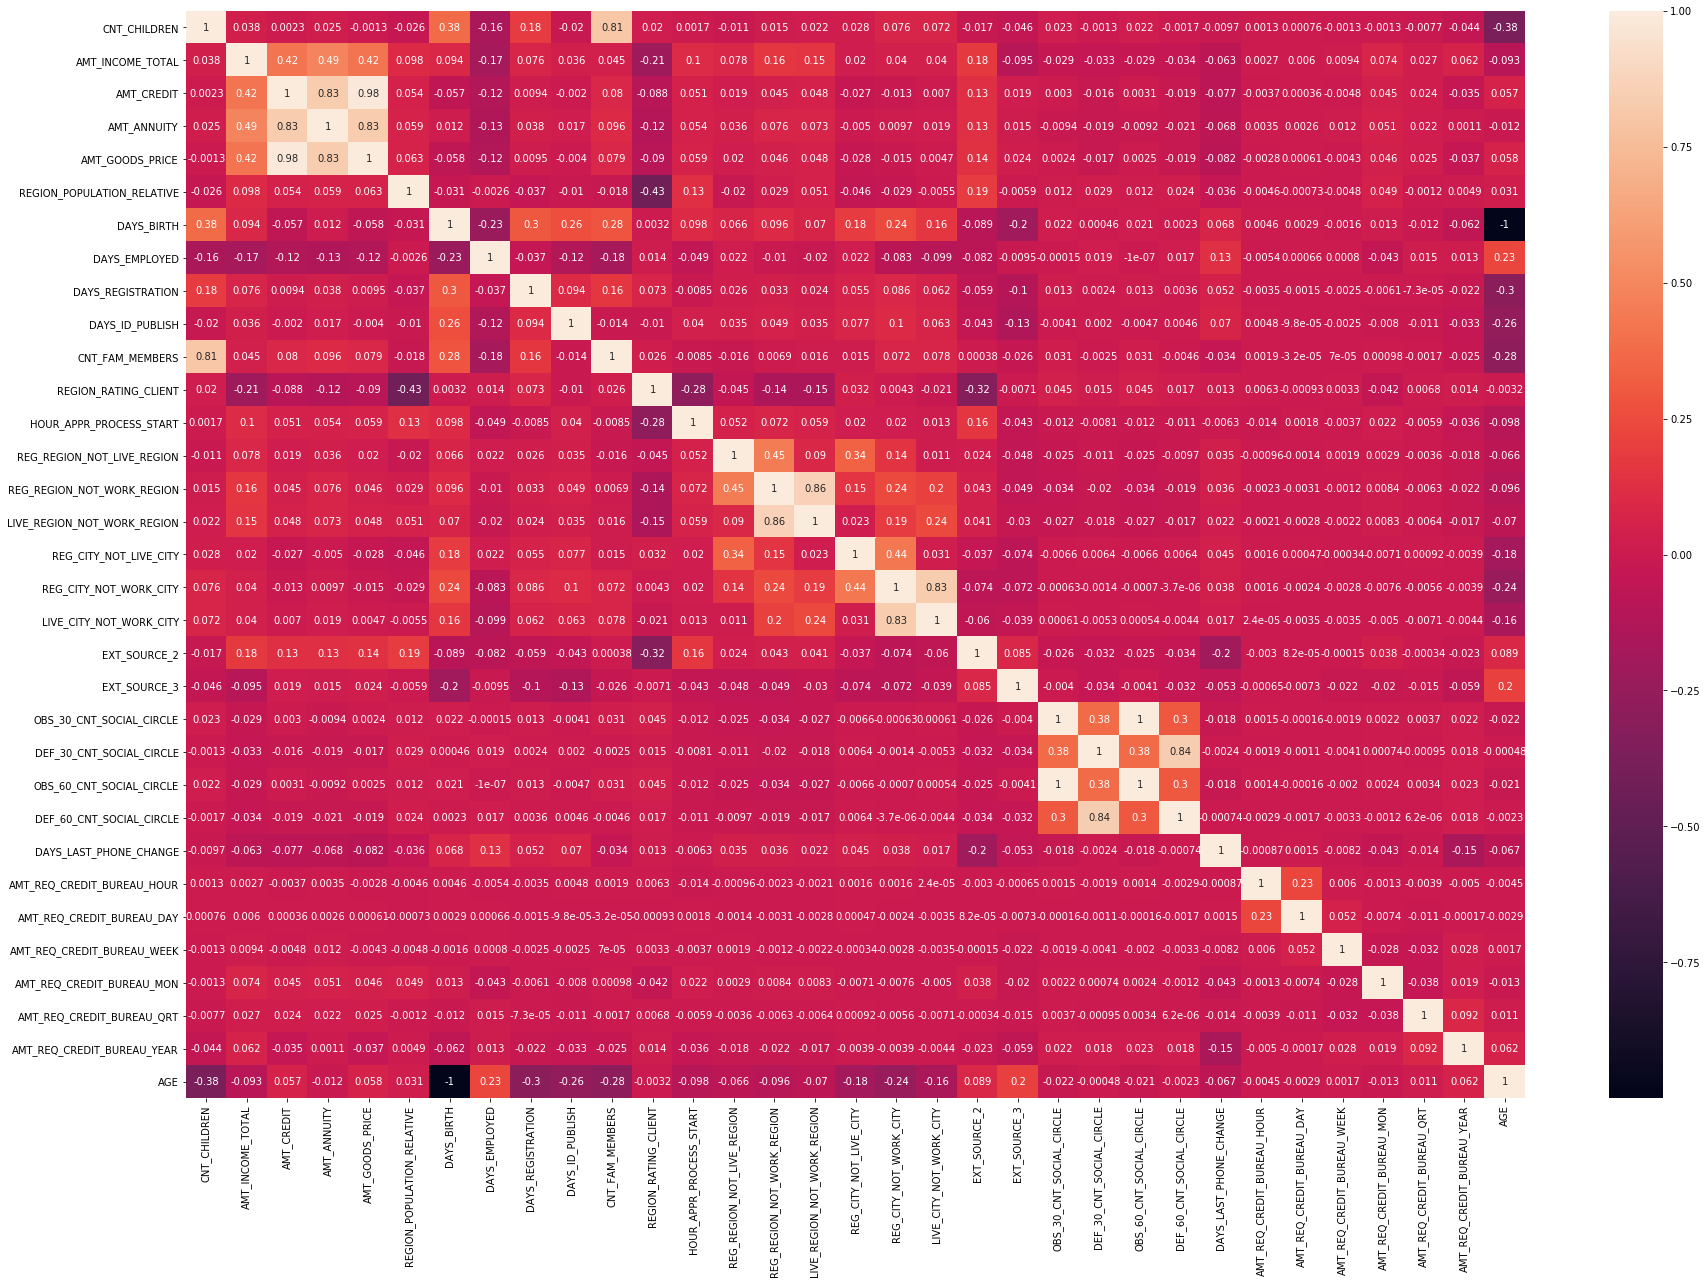

In [67]:
plt.figure(figsize=(30, 20))
sns.heatmap(target0,annot=True)
plt.show()

Here in the correlation matrix we can see highest correlated values. There are 10 columns which has high correlated values. ('Amt_Goods_price','AMT_ANNUITY','AMT_CREDIT','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS')

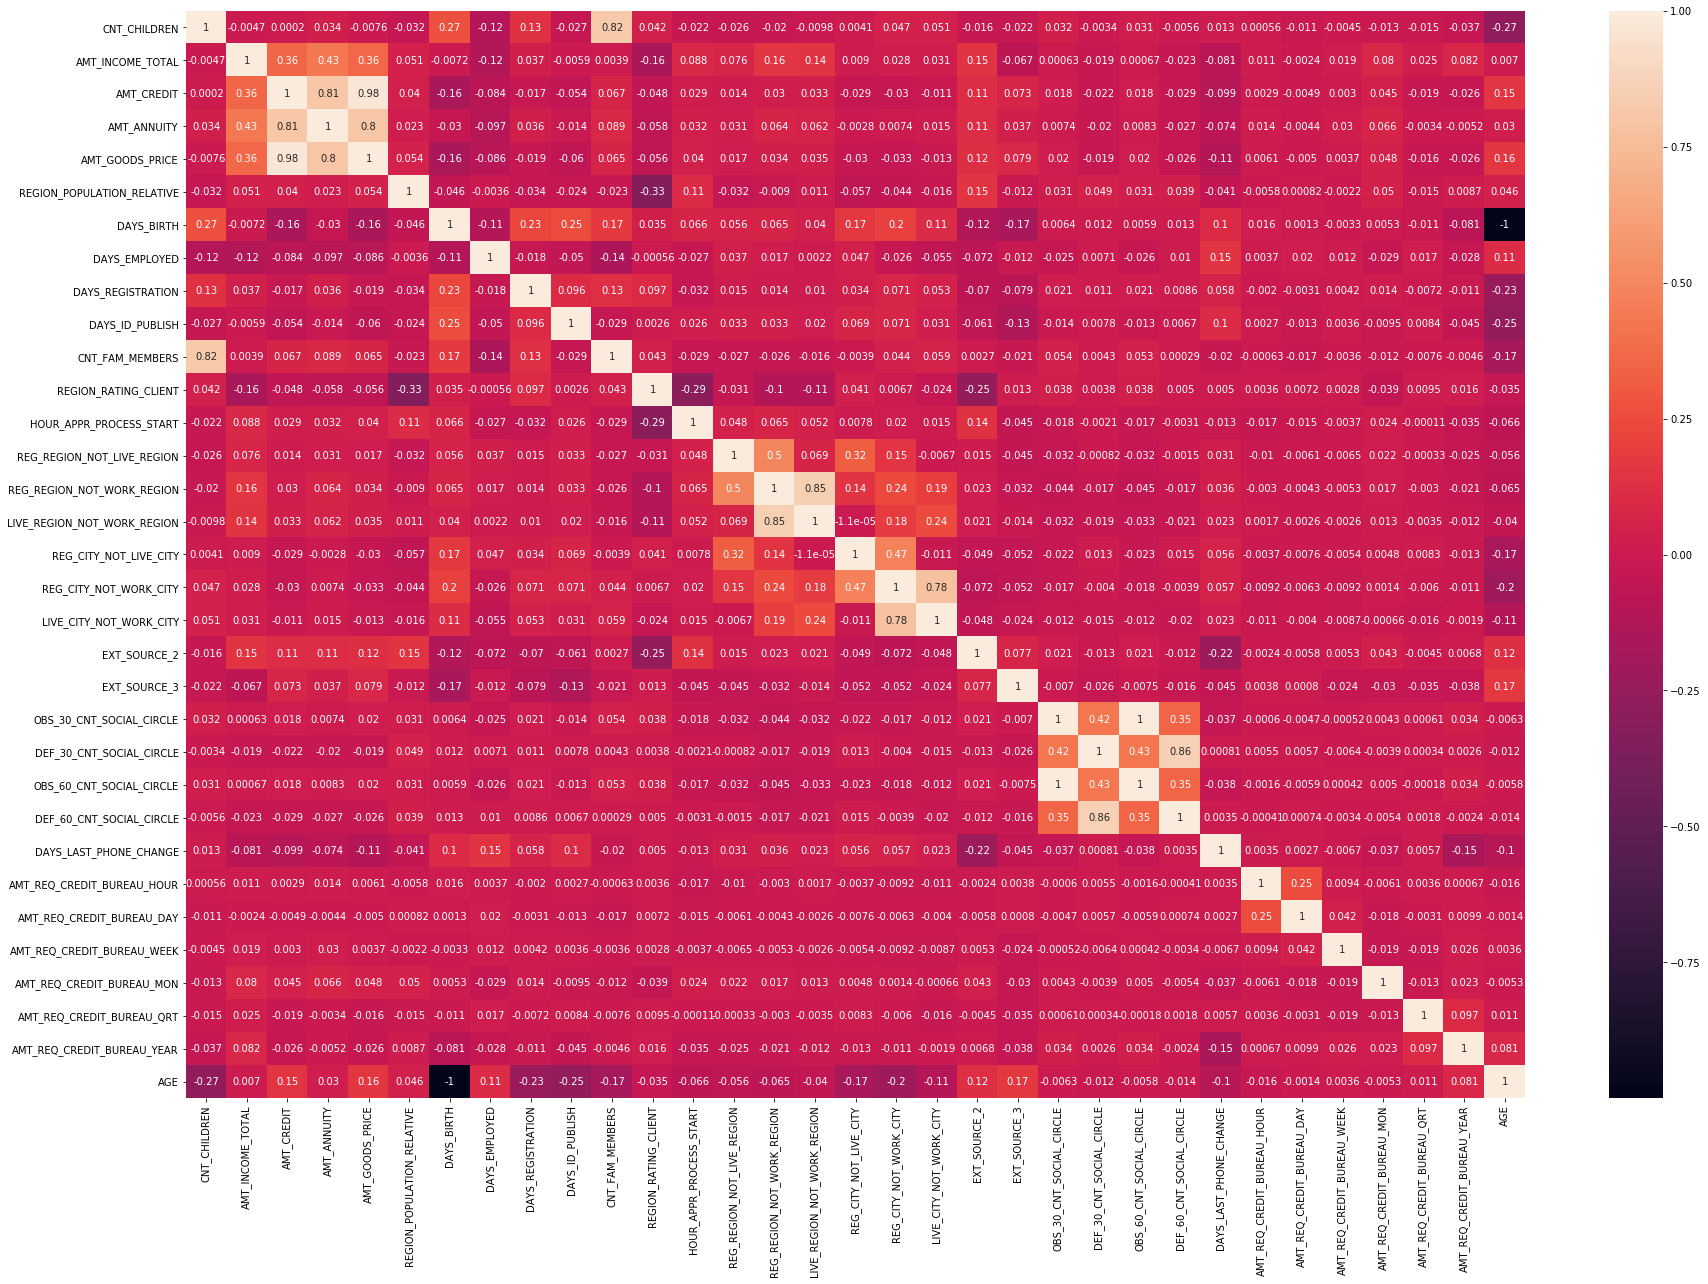

In [68]:
plt.figure(figsize=(30,20))
sns.heatmap(target1,annot=True)
plt.show()

Here in the correlation matrix we can see highest correlated values. There are 10 columns which has high correlated values. ('Amt_Goods_price','AMT_ANNUITY','AMT_CREDIT','REG_CITY_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_REGION',,'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS')

## 6.1 Merge two data frames previous application and new application

In [69]:
prev_Applicant.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [70]:
prev_Applicant.isnull().sum()/len(prev_Applicant)*100             ##percentage of null values in previous application

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [71]:
missing_v_per = list((prev_Applicant.isnull().sum()/len(prev_Applicant)*100).sort_values(ascending = False))
missing_val2 = pd.DataFrame(missing_v_per,columns = ['percent'])
missing_count2 = missing_val2[missing_val2['percent'] > 30]  ## null value columns greater than 30
missing_count2

,percent
0,99.643698
1,99.643698
2,53.636480
3,53.636480
4,49.119754
5,40.298129
6,40.298129
7,40.298129
8,40.298129
9,40.298129


In [72]:
col_null2 = prev_Applicant.columns[prev_Applicant.isnull().mean() > 0.30]
prev_Applicant.drop(labels = col_null2,axis = 1,inplace = True)    ## drop the columns which has greater than 30 null values

In [73]:
prev_Applicant.shape

(1670214, 26)

### merge 2 dataframes by using inner join

In [74]:
new_df=pd.merge(left=New_Applicant, right= prev_Applicant, how='inner', on='SK_ID_CURR') ## merge two dataframe using inner join on id

In [75]:
new_df.shape

(1413646, 74)

#### see the insights of contract status whether the loan is approved or not . If approved find the defaulters from that contract status

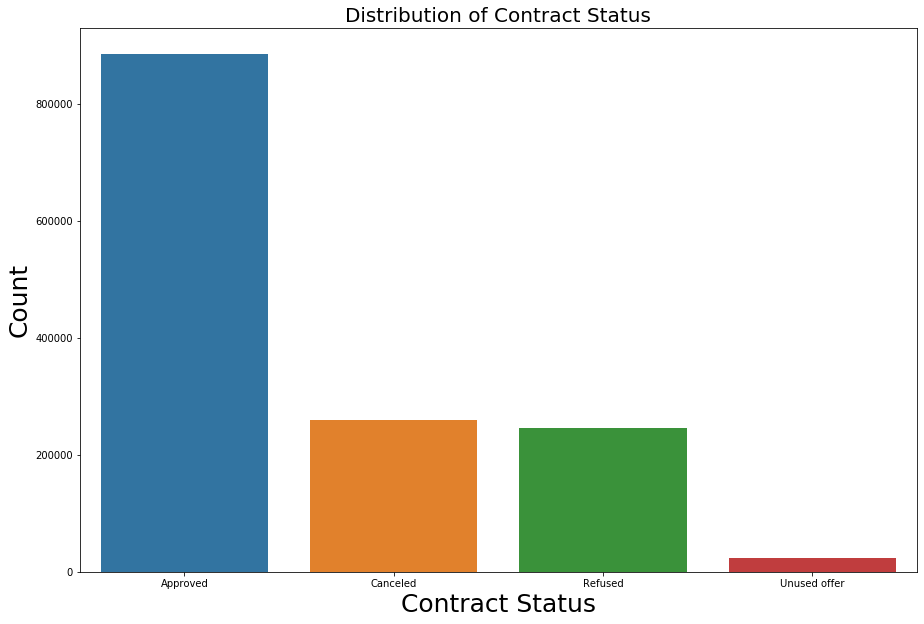

In [76]:
plt.figure(figsize=(15, 10))
sns.countplot(new_df.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count")
plt.title("Distribution of Contract Status",fontsize = 20)
plt.show()

#### Take 4 dataframes from above graph "Approved","Refused","Canceled","Unused"

In [77]:
Approved = new_df[new_df.NAME_CONTRACT_STATUS=='Approved']
Refused = new_df[new_df.NAME_CONTRACT_STATUS=='Refused']
Canceled = new_df[new_df.NAME_CONTRACT_STATUS=='Canceled']
Unused = new_df[new_df.NAME_CONTRACT_STATUS=='Unused Offer']


### 6.2 perform univariate analysis on combined data

In [78]:
def new_func(data):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
    
    s1=sns.countplot(ax=ax1,x=Refused[data], data=Refused, order= Refused[data].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    
    s2=sns.countplot(ax=ax2,x=Approved[data], data=Approved, order= Approved[data].value_counts().index,)
    s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_title("Approved", fontsize=10)
    
    plt.show()

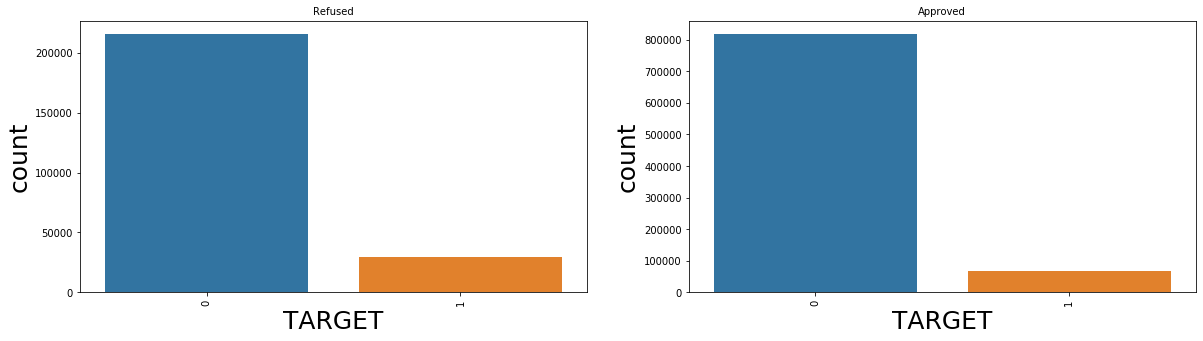

In [79]:
new_func('TARGET')

### 6.3 perform bivariate analysis on combined data

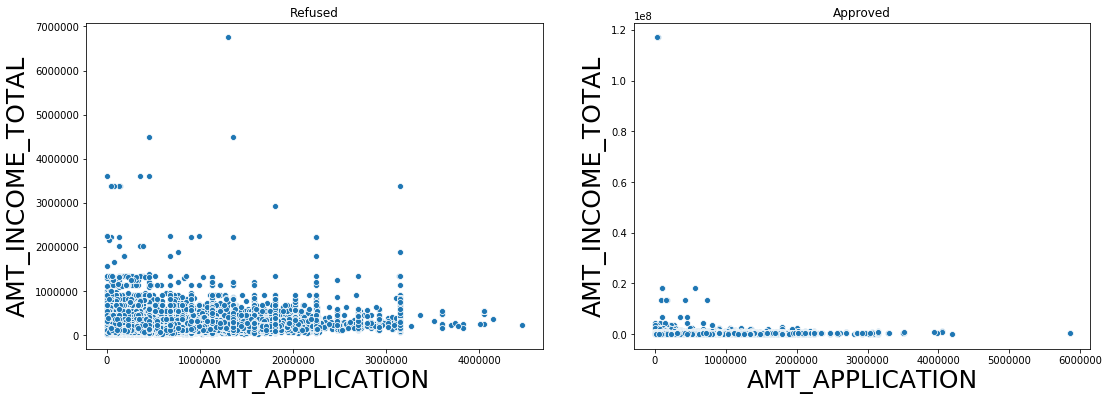

In [80]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=Refused)
plt.title('Refused')

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=Approved)
plt.title('Approved')
plt.show()

### As we can see that loan rejection will be more upto 2000000. Approved status has lower than refused status.